In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams   # to set permanent figure size
rcParams['figure.figsize'] = 12, 8
import warnings 
warnings.filterwarnings( "ignore")

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from statsmodels.tsa.stattools import adfuller
import itertools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

## This is to display multiple data frames from one cell
from IPython.display import display

In [3]:
df_2 = pd.read_csv("Sparkling.csv")

In [4]:
df_2.head().to_clipboard()

In [5]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_2.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [7]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [8]:
df = df_2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head().to_clipboard()

In [9]:
df.dtypes

Sparkling    int64
dtype: object

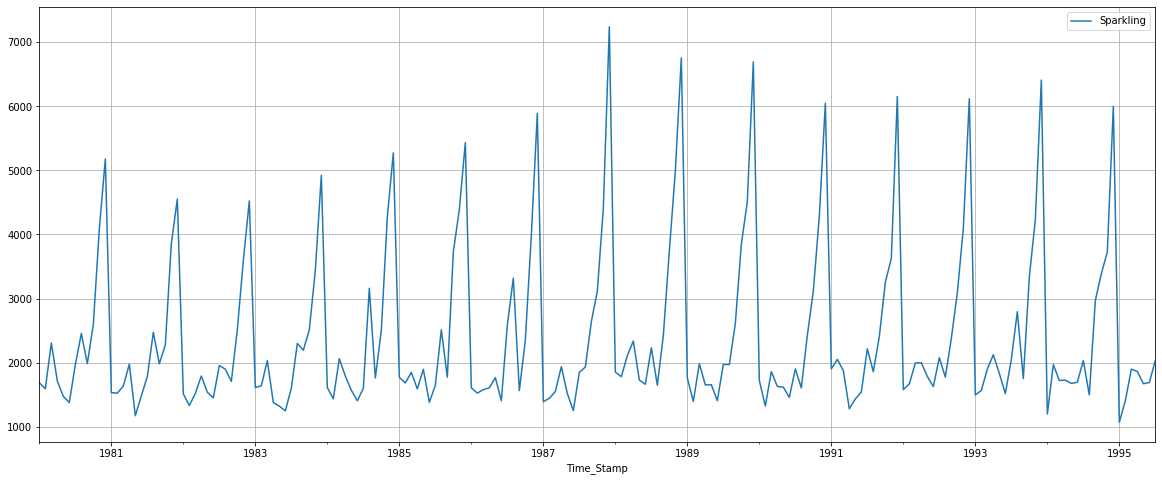

In [10]:
df.plot(figsize=(20,8))
plt.grid();

In [11]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [12]:
df.duplicated().sum()

11

In [13]:
df.shape

(187, 1)

In [14]:
round(df.describe(),3).to_clipboard()

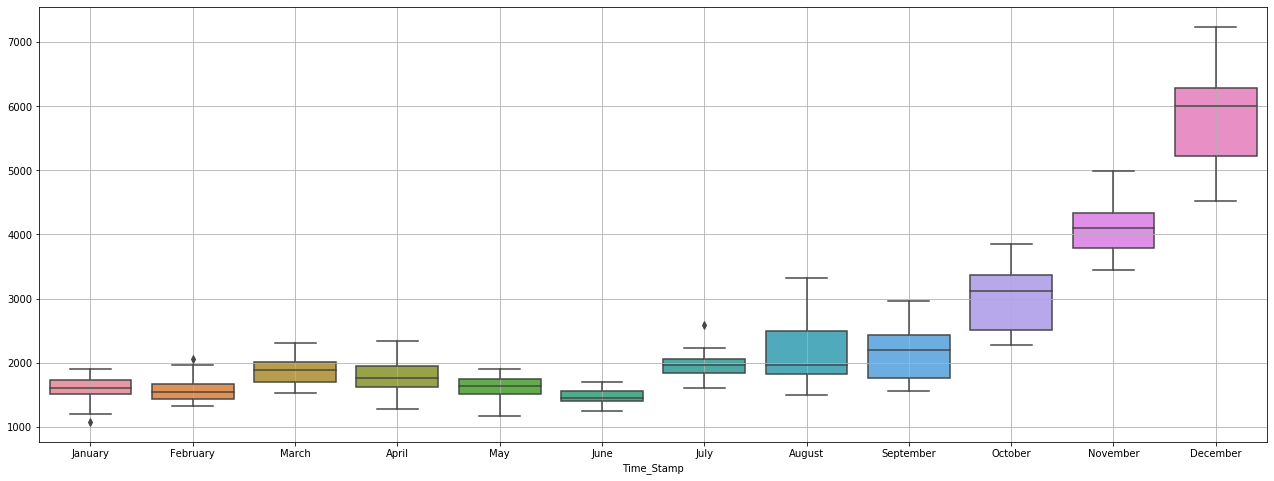

In [15]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

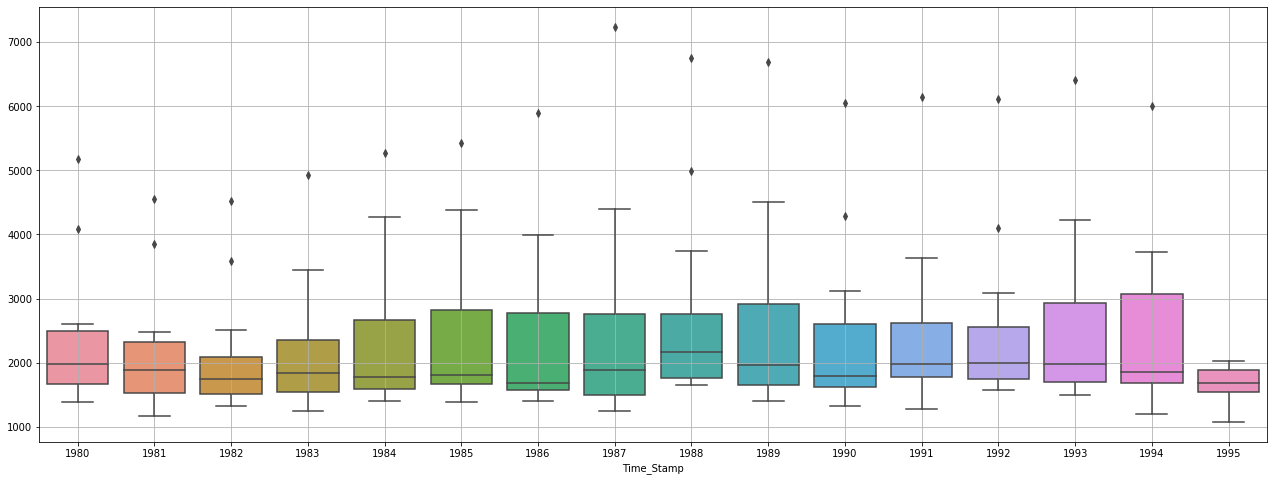

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

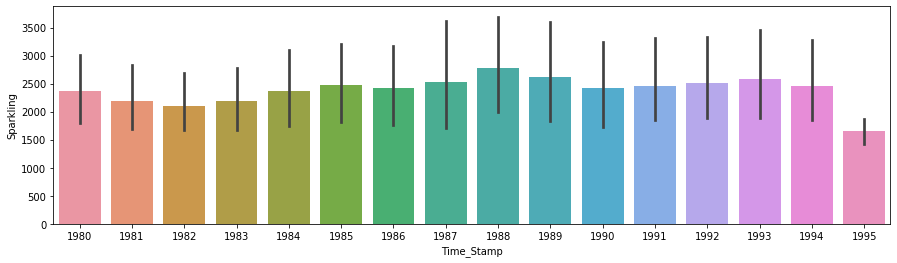

In [17]:
## Plot average sales for every year
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x=df.index.year, y='Sparkling', data=df, ax=axis1);

In [18]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years.to_clipboard()

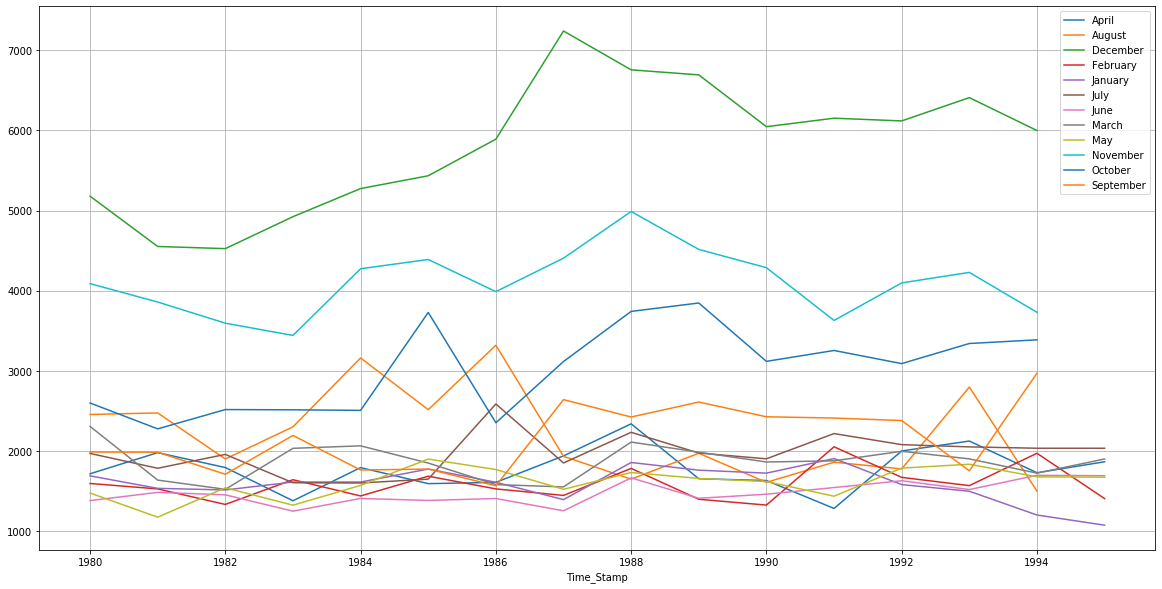

In [19]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

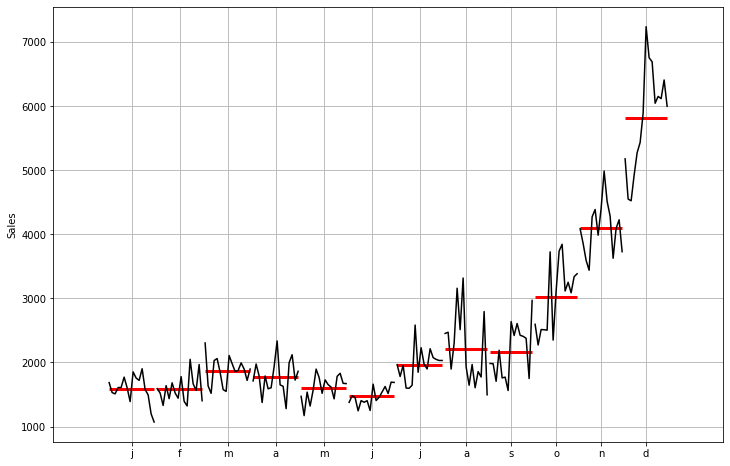

In [20]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

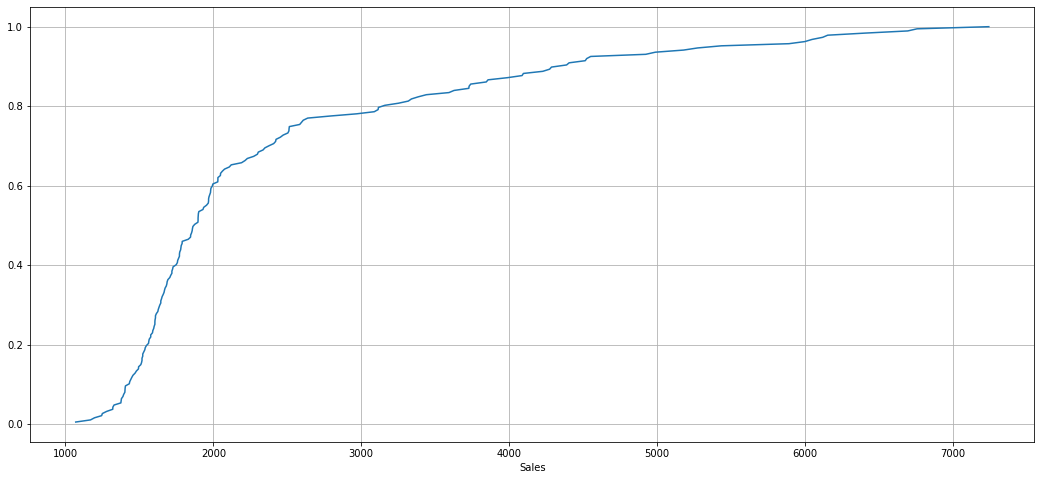

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

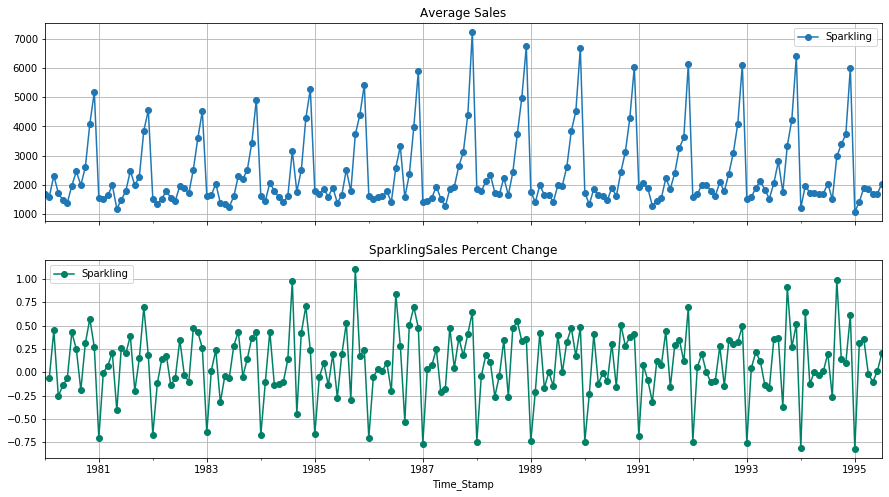

In [22]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="SparklingSales Percent Change",grid=True)

In [23]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

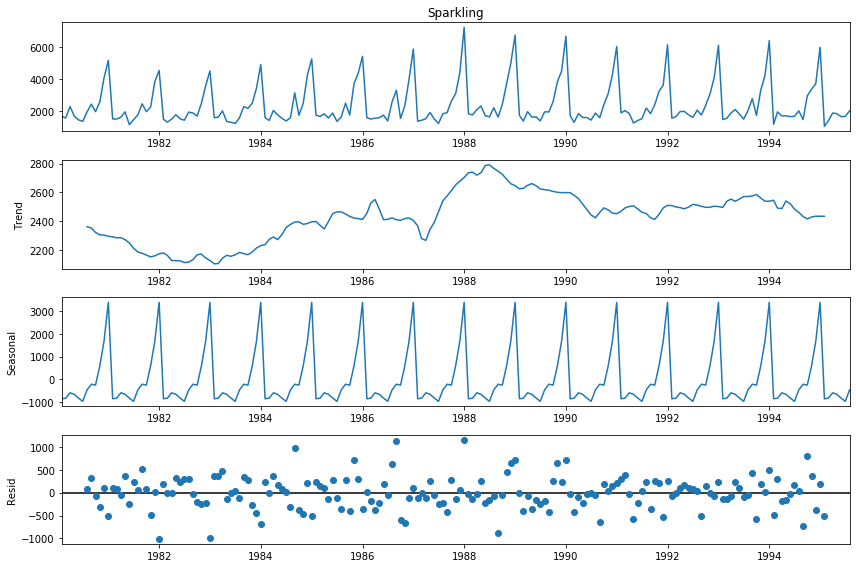

In [24]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

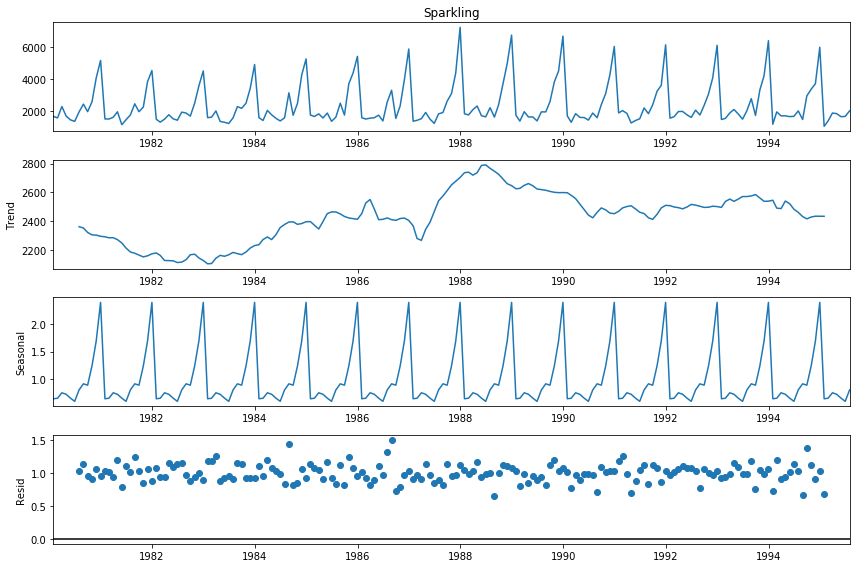

In [26]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [27]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [36]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [37]:
from IPython.display import display

In [38]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

First few rows of Test Data


Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

Last few rows of Test Data


Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [39]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


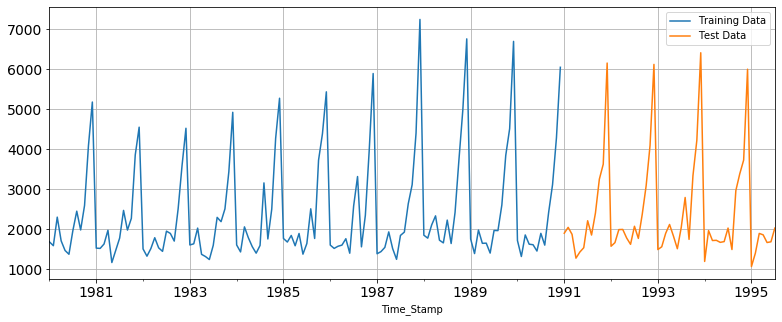

In [40]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [41]:
#Model 1: Linear Regression

In [42]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [43]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [44]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

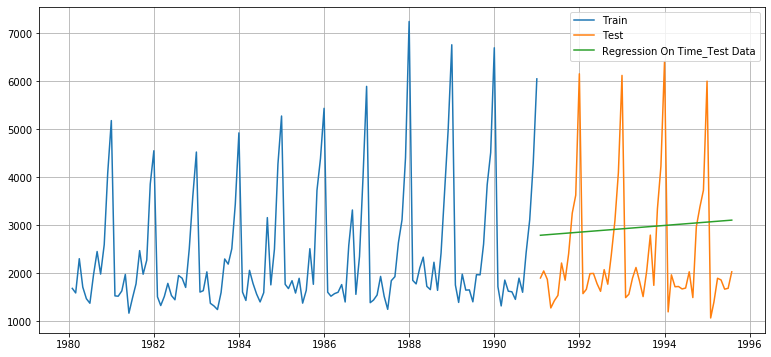

In [48]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [49]:
from sklearn import metrics

In [50]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [51]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf.to_clipboard()

In [52]:
#Model 2: Naive Approach: y^t+1=yt¶

In [53]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [54]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

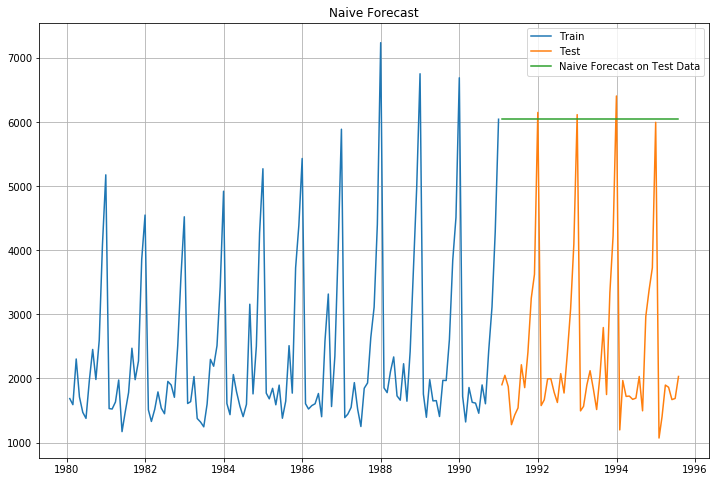

In [55]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [56]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [57]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf.to_clipboard()

In [58]:
#Method 3: Simple Average

In [59]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [60]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

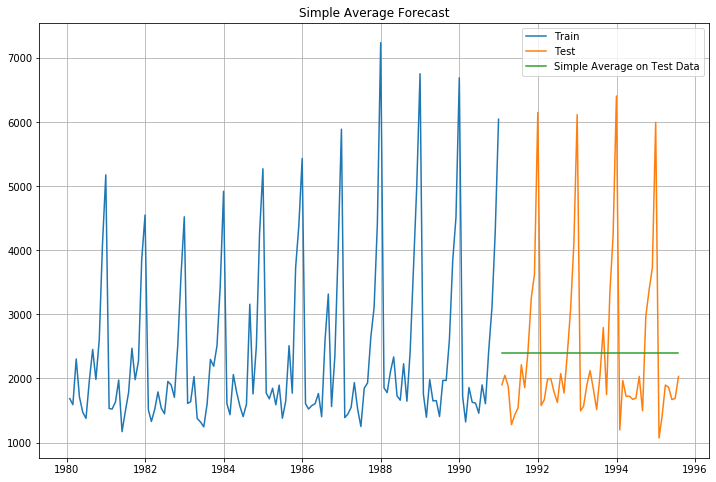

In [61]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [62]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [63]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf.to_clipboard()

In [64]:
#Method 4: Moving Average(MA)

In [65]:
MovingAverage = df.copy()
MovingAverage.head()

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Sparkling'].rolling(3).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()

MovingAverage.head()

Sparkling  Trailing_2   Trailing_3  Trailing_4  Trailing_6
Time_Stamp                                                            
1980-01-31       1686         NaN          NaN         NaN         NaN
1980-02-29       1591      1638.5          NaN         NaN         NaN
1980-03-31       2304      1947.5  1860.333333         NaN         NaN
1980-04-30       1712      2008.0  1869.000000     1823.25         NaN
1980-05-31       1471      1591.5  1829.000000     1769.50         NaN

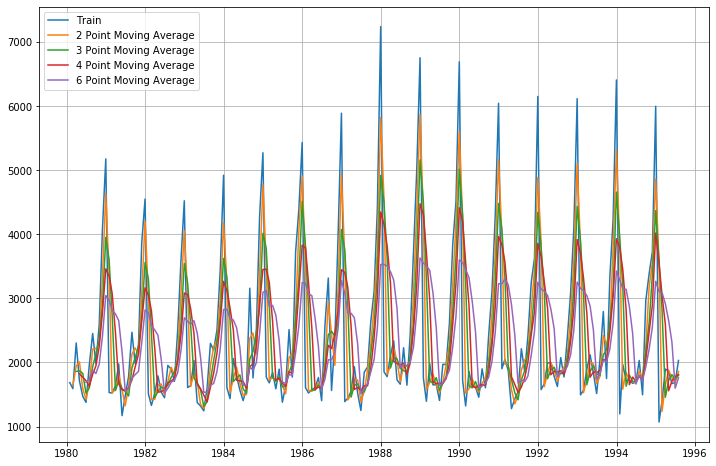

In [66]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'],label = '4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [67]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

In [68]:
print('First few rows of Training Data')
display(trailing_MovingAverage_train.head())
print('Last few rows of Training Data')
display(trailing_MovingAverage_train.tail())
print('First few rows of Test Data')
display(trailing_MovingAverage_test.head())
print('Last few rows of Test Data')
display(trailing_MovingAverage_test.tail())

First few rows of Training Data


Sparkling  Trailing_2   Trailing_3  Trailing_4  Trailing_6
Time_Stamp                                                            
1980-01-31       1686         NaN          NaN         NaN         NaN
1980-02-29       1591      1638.5          NaN         NaN         NaN
1980-03-31       2304      1947.5  1860.333333         NaN         NaN
1980-04-30       1712      2008.0  1869.000000     1823.25         NaN
1980-05-31       1471      1591.5  1829.000000     1769.50         NaN

Last few rows of Training Data


Sparkling  Trailing_2   Trailing_3  Trailing_4   Trailing_6
Time_Stamp                                                             
1990-08-31       1605      1752.0  1653.666667     1644.00  1677.166667
1990-09-30       2424      2014.5  1976.000000     1846.25  1771.333333
1990-10-31       3116      2770.0  2381.666667     2261.00  2019.333333
1990-11-30       4286      3701.0  3275.333333     2857.75  2464.500000
1990-12-31       6047      5166.5  4483.000000     3968.25  3229.500000

First few rows of Test Data


Sparkling  Trailing_2   Trailing_3  Trailing_4   Trailing_6
Time_Stamp                                                             
1991-01-31       1902      3974.5  4078.333333     3837.75  3230.000000
1991-02-28       2049      1975.5  3332.666667     3571.00  3304.000000
1991-03-31       1874      1961.5  1941.666667     2968.00  3212.333333
1991-04-30       1279      1576.5  1734.000000     1776.00  2906.166667
1991-05-31       1432      1355.5  1528.333333     1658.50  2430.500000

Last few rows of Test Data


Sparkling  Trailing_2   Trailing_3  Trailing_4   Trailing_6
Time_Stamp                                                             
1995-03-31       1897      1649.5  1456.333333     2592.00  2913.666667
1995-04-30       1862      1879.5  1720.333333     1557.75  2659.833333
1995-05-31       1670      1766.0  1809.666667     1707.75  2316.666667
1995-06-30       1688      1679.0  1740.000000     1779.25  1598.166667
1995-07-31       2031      1859.5  1796.333333     1812.75  1758.333333

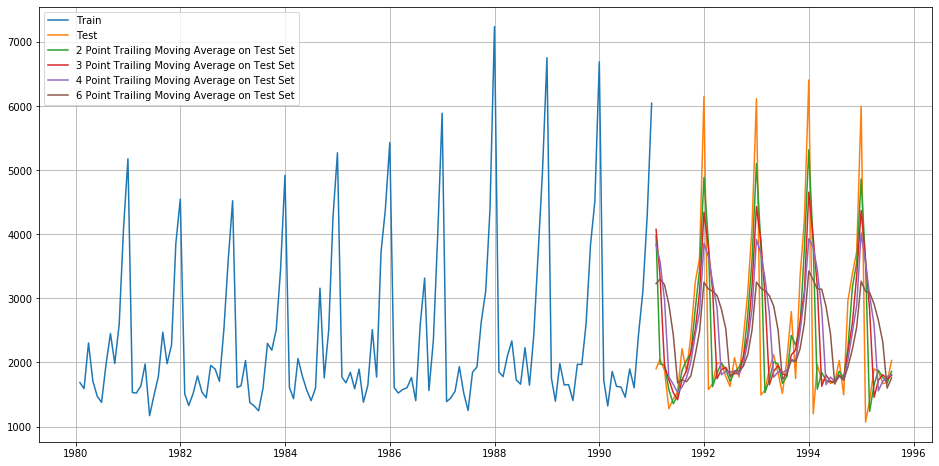

In [69]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label = '4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [70]:
rmse_model4_test_2 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 3 point Trailing MA

rmse_model4_test_3 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_3
                                          ,rmse_model4_test_4,rmse_model4_test_6]}
                           ,index=['2pointTrailingMovingAverage','3pointTrailingMovingAverage'
                                   ,'4pointTrailingMovingAverage','6pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 3 point Moving Average Model forecast on the Training Data,  RMSE is 1028.606
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927


Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
3pointTrailingMovingAverage  1028.605756
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428

In [71]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [72]:
SES_train = train.copy()
SES_test = test.copy()

In [73]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [74]:
model_SES_autofit = model_SES.fit(optimized=True)

In [75]:
model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7856210776245,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  2403.785621
1991-02-28       2049  2403.785621
1991-03-31       1874  2403.785621
1991-04-30       1279  2403.785621
1991-05-31       1432  2403.785621

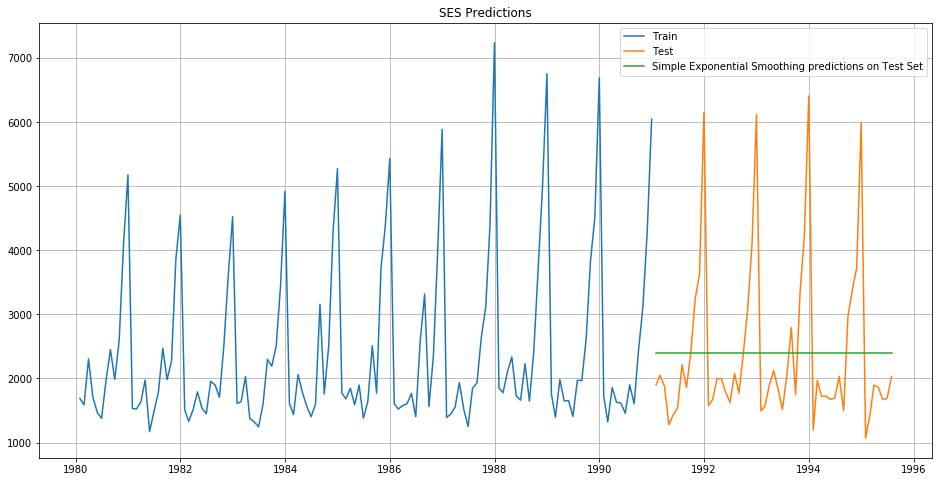

In [77]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('SES Predictions');

In [78]:

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1275.082


In [79]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf.to_clipboard

<bound method NDFrame.to_clipboard of                                Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
3pointTrailingMovingAverage  1028.605756
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
SimpleExponentialSmoothing   1275.081823>

In [80]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [81]:
DES_train = train.copy()
DES_test = test.copy()

In [82]:
model_DES = Holt(DES_train['Sparkling'])
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 0.6478137983008563,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1686.0837778875616,
 'initial_slope': 27.06051184255422,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [83]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sparkling      predict
Time_Stamp                        
1991-01-31       1902  5281.503187
1991-02-28       2049  5308.563699
1991-03-31       1874  5335.624211
1991-04-30       1279  5362.684723
1991-05-31       1432  5389.745234

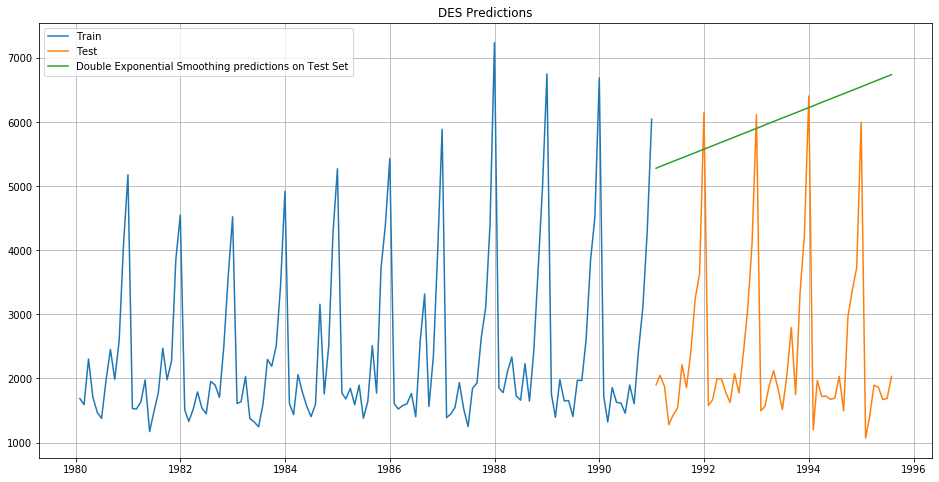

In [84]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('DES Predictions');

In [85]:

rmse_model7_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model7_test_1))

Double Exponential Smoothing Model forecast on the Test Data, RMSE is 3851.073


In [86]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_1]},index=['DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf.to_clipboard()

In [87]:
TES_train = train.copy()
TES_test = test.copy()

In [88]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [89]:
model_TES_autofit = model_TES.fit()

In [90]:
model_TES_autofit.params

{'smoothing_level': 0.15422043724083787,
 'smoothing_slope': 2.7016118310306043e-21,
 'smoothing_seasonal': 0.37132361273463527,
 'damping_slope': nan,
 'initial_level': 1639.999343205301,
 'initial_slope': 4.848648986644784,
 'initial_seasons': array([1.00841815, 0.96898257, 1.24179222, 1.13205604, 0.93980962,
        0.93811109, 1.22458123, 1.54428823, 1.27336092, 1.63198272,
        2.48293081, 3.11862208]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [91]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1602.189767
1991-02-28       2049   1373.885710
1991-03-31       1874   1807.438730
1991-04-30       1279   1704.574020
1991-05-31       1432   1602.377579

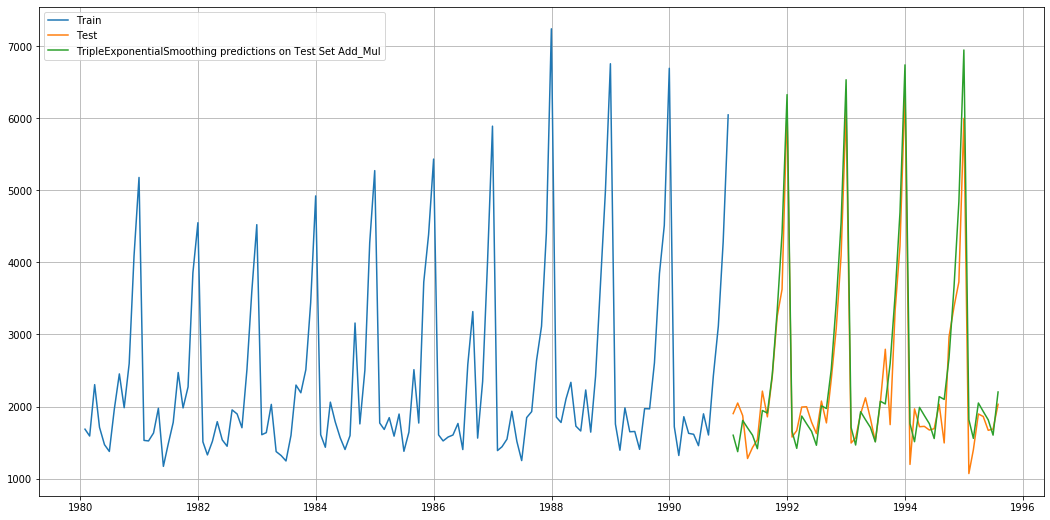

In [92]:

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set Add_Mul')


plt.legend(loc='best')
plt.grid();


In [93]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 383.183


In [94]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['TES_Add_Mul'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf.to_clipboard()

In [96]:
model_TES1 = ExponentialSmoothing(TES_train['Sparkling'],trend='multiplicative',seasonal='multiplicative',freq='M')

In [97]:
    model_TES_autofit = model_TES1.fit()

In [98]:
model_TES_autofit.params

{'smoothing_level': 0.15340799299595567,
 'smoothing_slope': 1.4578242858544946e-16,
 'smoothing_seasonal': 0.36918563259948295,
 'damping_slope': nan,
 'initial_level': 1640.00008048211,
 'initial_slope': 1.002822086250115,
 'initial_seasons': array([1.00890155, 0.96940434, 1.2425392 , 1.13281286, 0.94019572,
        0.93836077, 1.225938  , 1.54668454, 1.27513351, 1.63558138,
        2.48868762, 3.12682145]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [99]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1603.341330
1991-02-28       2049   1375.753403
1991-03-31       1874   1808.554840
1991-04-30       1279   1706.321378
1991-05-31       1432   1603.416604

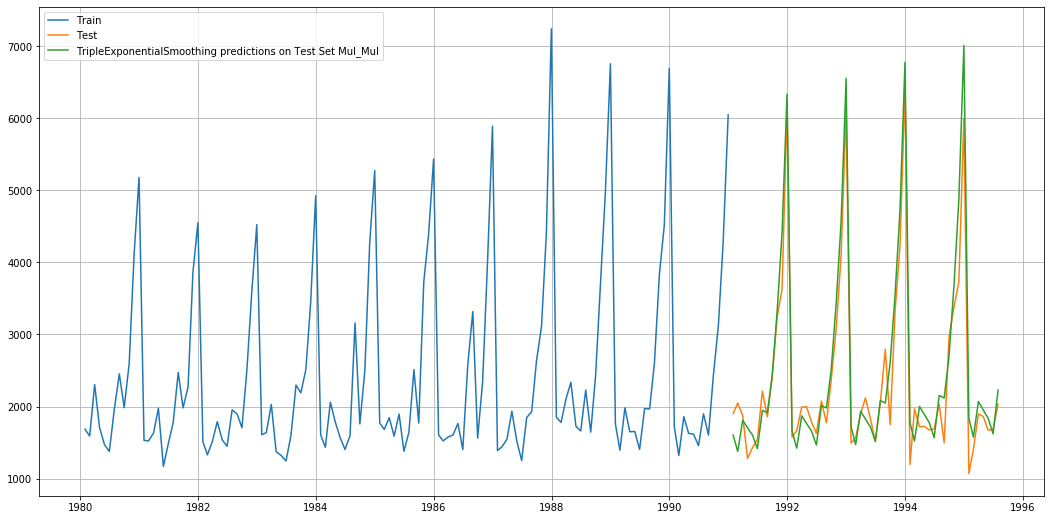

In [100]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set Mul_Mul')


plt.legend(loc='best')
plt.grid();

In [101]:
rmse_model9_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model9_test_1))

Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 392.869


In [102]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': [rmse_model9_test_1]}
                           ,index=['TES_MUL_MUL'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
3pointTrailingMovingAverage  1028.605756
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
SimpleExponentialSmoothing   1275.081823
DoubleExponentialSmoothing   3851.072597
TES_Add_Mul                   383.182745
TES_MUL_MUL                   392.869127

In [104]:
model_TES2 = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',freq='M')

In [105]:
model_TES_autofit = model_TES2.fit()

In [106]:
model_TES_autofit.params

{'smoothing_level': 0.08621947613454733,
 'smoothing_slope': 2.6874330863382154e-08,
 'smoothing_seasonal': 0.4763612183448062,
 'damping_slope': nan,
 'initial_level': 1684.809720734794,
 'initial_slope': 0.006601124491771914,
 'initial_seasons': array([  39.19059509,  -37.24835927,  464.88056614,  205.99095389,
        -140.66424075, -156.79570166,  338.0811185 ,  856.82160873,
         403.52711408,  971.26615796, 2401.64073231, 3426.75506275]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [107]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling  auto_predict
Time_Stamp                         
1991-01-31       1902   1532.422837
1991-02-28       2049   1241.383411
1991-03-31       1874   1726.781799
1991-04-30       1279   1584.323098
1991-05-31       1432   1494.024475

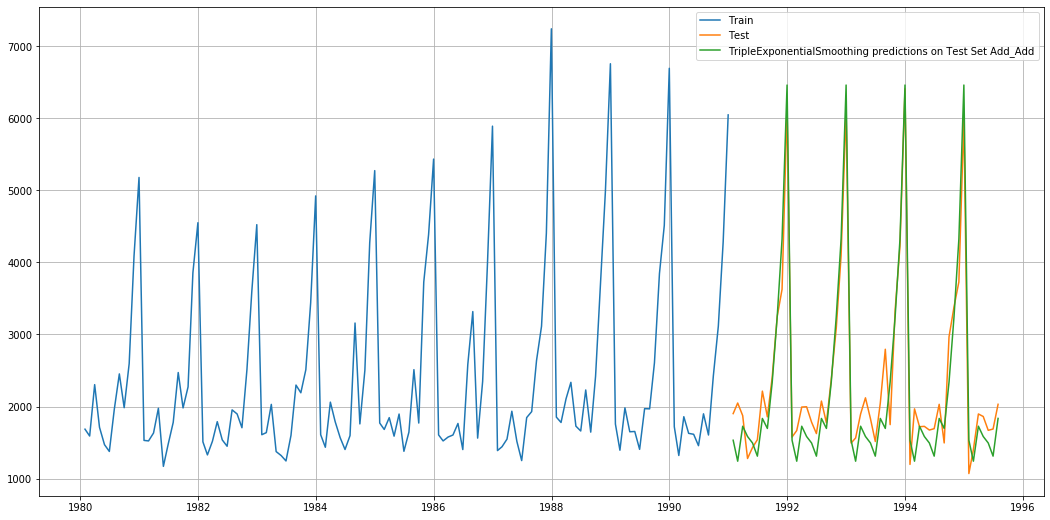

In [108]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='TripleExponentialSmoothing predictions on Test Set Add_Add')


plt.legend(loc='best')
plt.grid();

In [109]:
rmse_model11_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model11_test_1))

Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 362.732


In [117]:
resultsDf_11_1 = pd.DataFrame({'Test RMSE': [rmse_model11_test_1]}
                           ,index=['TES_ADD_ADD'])

resultsDf = pd.concat([resultsDf, resultsDf_11_1])
resultsDf.to_clipboard()

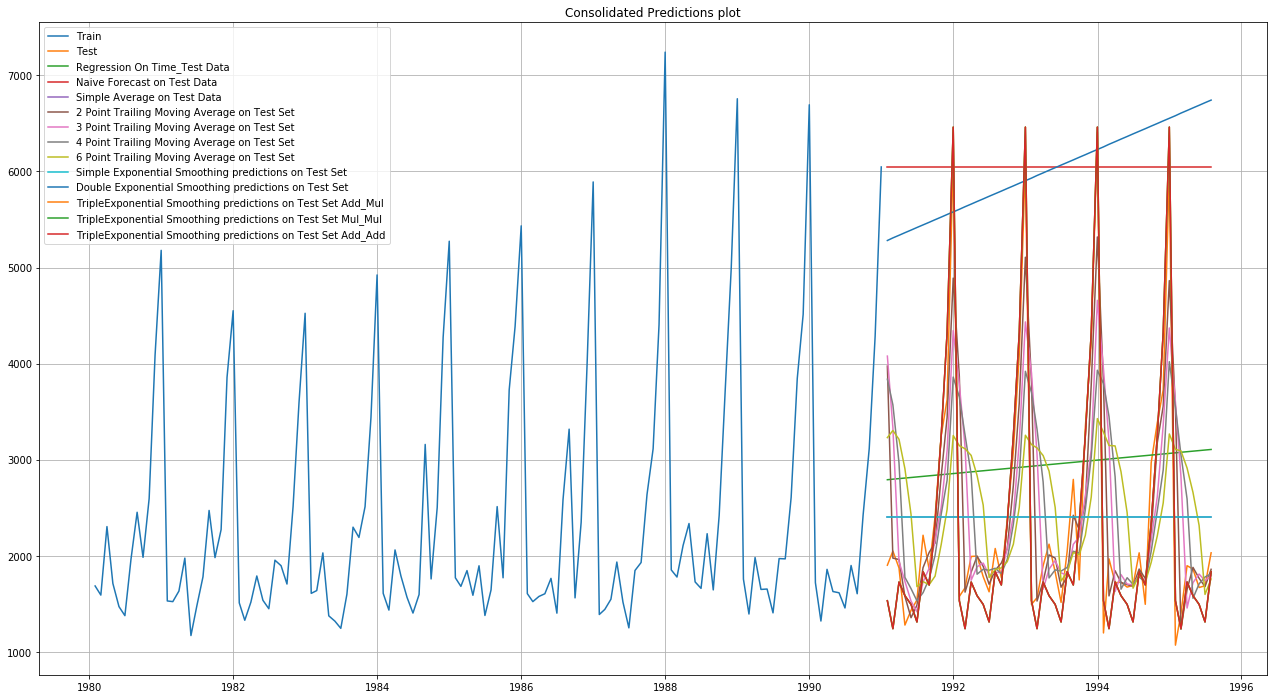

In [118]:
## Plotting the Training data, Test data and the forecasted values

plt.figure(figsize=(22,12))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label = '4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict'], label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='TripleExponential Smoothing predictions on Test Set Add_Mul')
plt.plot(TES_test['auto_predict'], label='TripleExponential Smoothing predictions on Test Set Mul_Mul')
plt.plot(TES_test['auto_predict'], label='TripleExponential Smoothing predictions on Test Set Add_Add')

plt.legend(loc='best')
plt.grid()
plt.title('Consolidated Predictions plot');

In [120]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

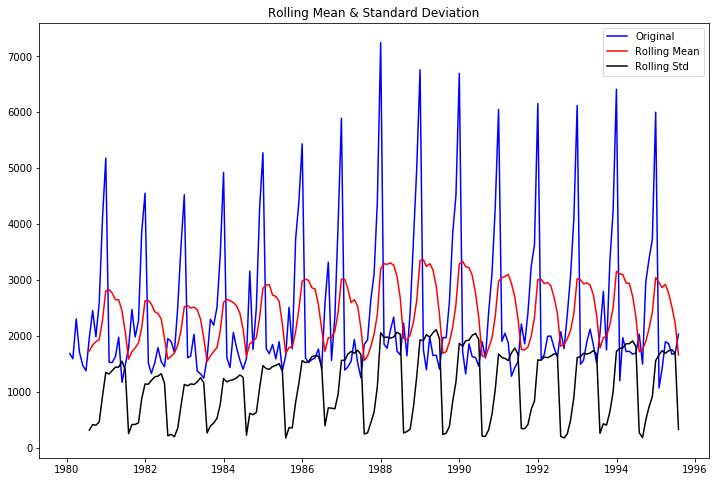

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [121]:
test_stationarity(df['Sparkling'])

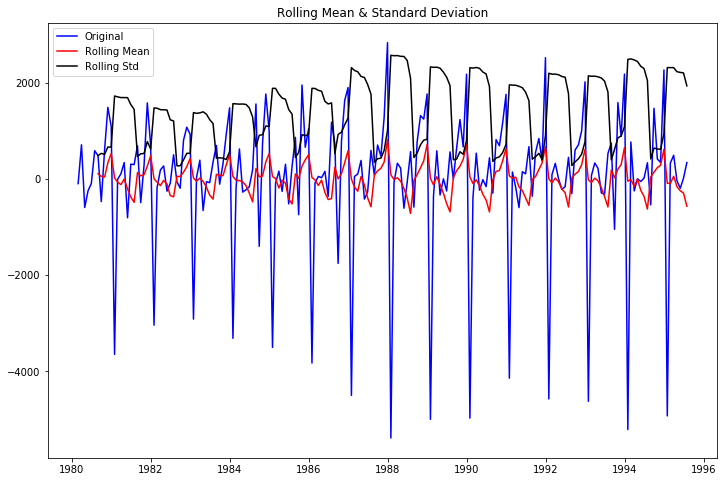

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [122]:
test_stationarity(df['Sparkling'].diff().dropna())

In [112]:
def check_stationarity(ts):
    dftest1 = adfuller(ts,regression='ct')
    pvalue = dftest1[1]
    if (pvalue < 0.05):
        print('Stationary')
    else:
        print('Not Stationary')

In [113]:
#Decompose the time series multiplicatively
#not suitable if there are 0 or -ve values

df_mul_decompose1 = seasonal_decompose(train, model = 'additive')
seasonal = df_mul_decompose1.seasonal
check_stationarity(seasonal)

Stationary


In [114]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932101
Number of lags used 12


In [115]:

dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


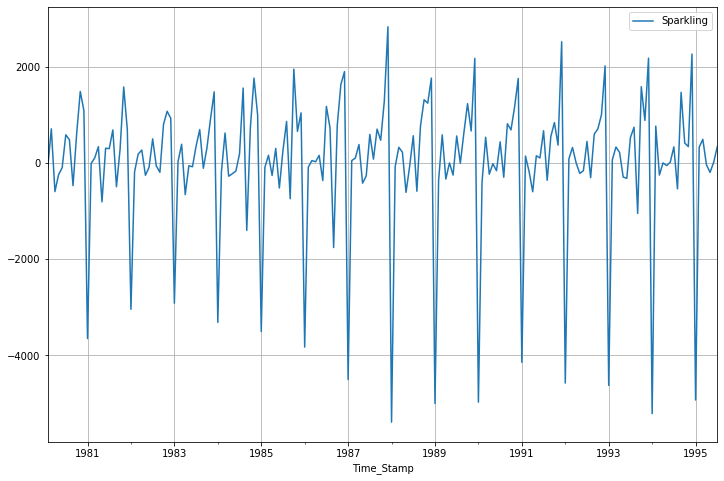

In [116]:

df.diff().dropna().plot(grid=True);

In [135]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [124]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [125]:
for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015592425
ARIMA(0, 1, 2) - AIC:2234.4083231342192
ARIMA(1, 1, 0) - AIC:2266.608539319009
ARIMA(1, 1, 1) - AIC:2235.75509467321
ARIMA(1, 1, 2) - AIC:2234.527200452548
ARIMA(2, 1, 0) - AIC:2260.3657439680865
ARIMA(2, 1, 1) - AIC:2233.7776263299156
ARIMA(2, 1, 2) - AIC:2213.5092123639834


In [126]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
8  (2, 1, 2)  2213.509212
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)  2234.527200
4  (1, 1, 1)  2235.755095

In [127]:
auto_ARIMA = ARIMA(train, order=(2, 1, 2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 23 Jan 2022   AIC                           2213.509
Time:                        08:25:08   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

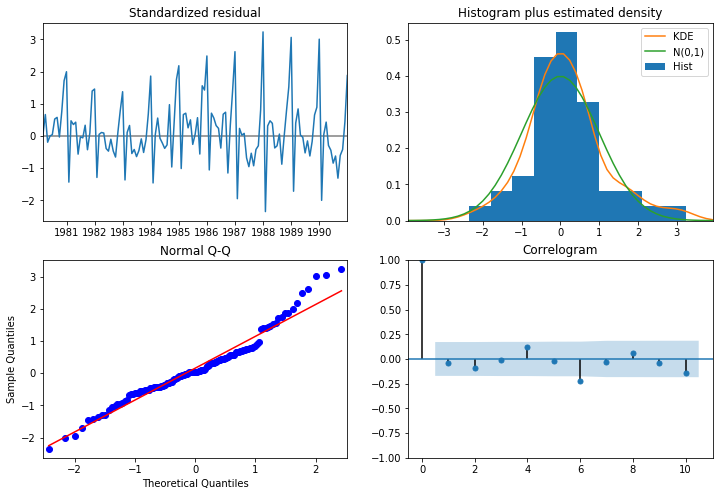

In [128]:
results_auto_ARIMA.plot_diagnostics();

In [129]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
predicted_auto_ARIMA_df = test.copy()
predicted_auto_ARIMA_df['ARIMA_AIC'] = predicted_auto_ARIMA
predicted_auto_ARIMA_df.head()

Sparkling    ARIMA_AIC
Time_Stamp                        
1991-01-31       1902  4252.392049
1991-02-28       2049  2863.119997
1991-03-31       1874  2043.968662
1991-04-30       1279  1746.175377
1991-05-31       1432  1813.592557

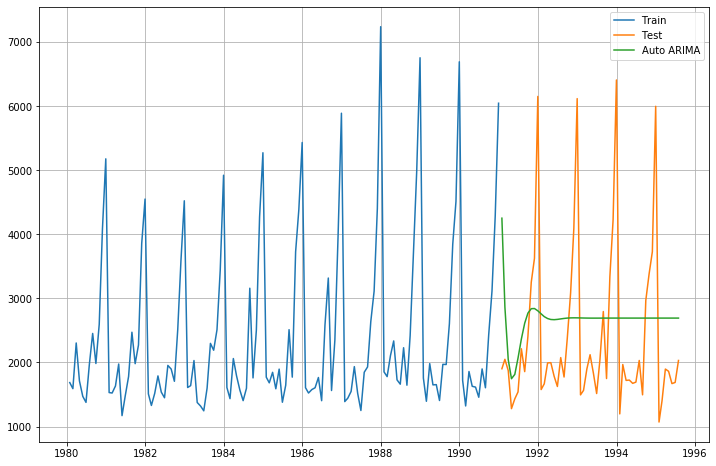

In [130]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_auto_ARIMA, label='Auto ARIMA')

plt.legend(loc='best')
plt.grid()

In [131]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [132]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9794699944175 
MAPE: 47.09983877287205


In [133]:
resultsDf_10 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['AIC_ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
3pointTrailingMovingAverage  1028.605756
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
SimpleExponentialSmoothing   1275.081823
DoubleExponentialSmoothing   3851.072597
TES_Add_Mul                   383.182745
TES_MUL_MUL                   392.869127
TES_ADD_ADD                   362.731657
TES_ADD_ADD                   362.731657
AIC_ARIMA(2,1,2)             1299.979470

In [136]:
#Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

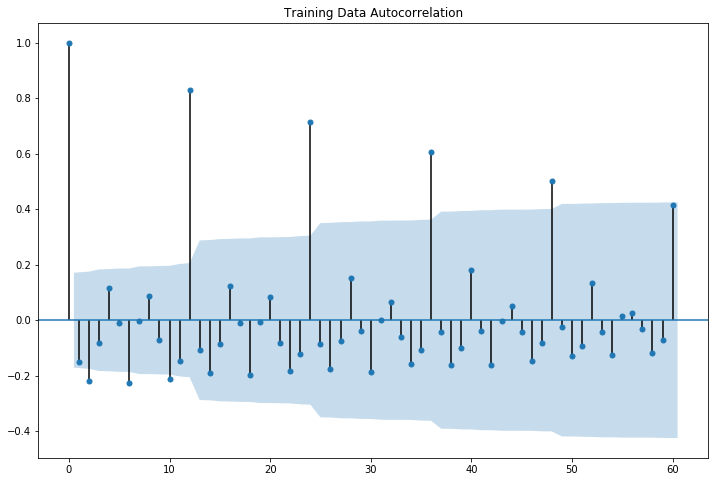

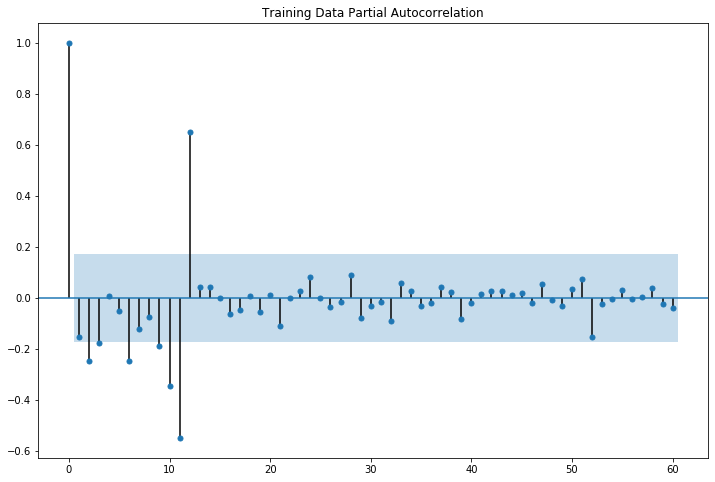

In [137]:
plot_acf(train.diff().dropna(), lags=60, title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(), lags=60, title='Training Data Partial Autocorrelation',method='ywmle');
plt.show()

In [138]:
#Here, we have taken alpha=0.05.

#The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
#The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
#By looking at the above plots, we will take the value of p and q to be 0 and 0 respectively.

In [139]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 23 Jan 2022   AIC                           2267.663
Time:                        09:00:03   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (Q):                      347.60   Jarque-Bera (JB):               198.83
Prob(Q):                              0.00   Pr

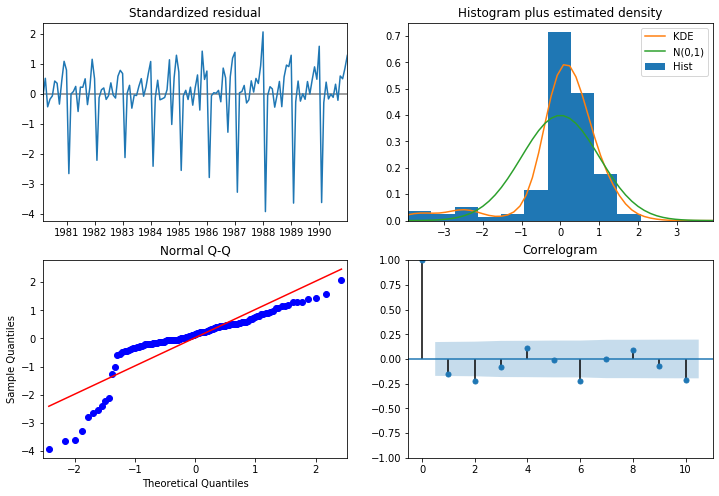

In [140]:
results_manual_ARIMA.plot_diagnostics();

In [141]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
predicted_manual_ARIMA_df = test.copy()
predicted_manual_ARIMA_df['ARIMA_Manual'] = predicted_manual_ARIMA
predicted_manual_ARIMA_df.head()

Sparkling  ARIMA_Manual
Time_Stamp                         
1991-01-31       1902        6047.0
1991-02-28       2049        6047.0
1991-03-31       1874        6047.0
1991-04-30       1279        6047.0
1991-05-31       1432        6047.0

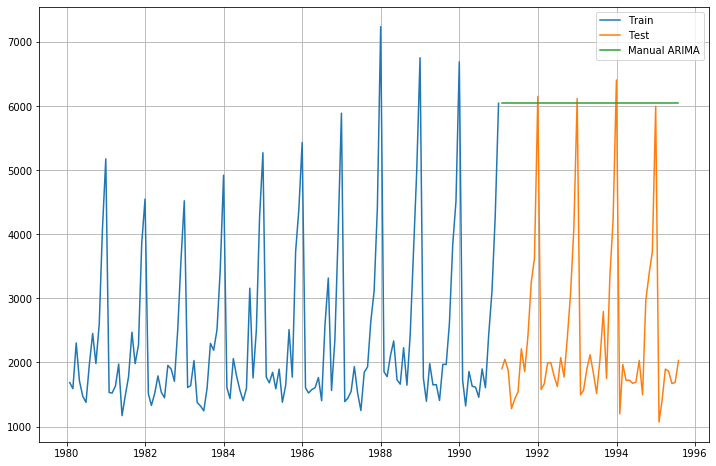

In [142]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA')

plt.legend(loc='best')
plt.grid()

In [143]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

resultsDf_11 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Manual_ARIMA(0,1,0)'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


Test RMSE
RegressionOnTime             1389.135175
NaiveModel                   3864.279352
SimpleAverageModel           1275.081804
2pointTrailingMovingAverage   813.400684
3pointTrailingMovingAverage  1028.605756
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
SimpleExponentialSmoothing   1275.081823
DoubleExponentialSmoothing   3851.072597
TES_Add_Mul                   383.182745
TES_MUL_MUL                   392.869127
TES_ADD_ADD                   362.731657
TES_ADD_ADD                   362.731657
AIC_ARIMA(2,1,2)             1299.979470
Manual_ARIMA(0,1,0)          3864.279352

In [144]:
#Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

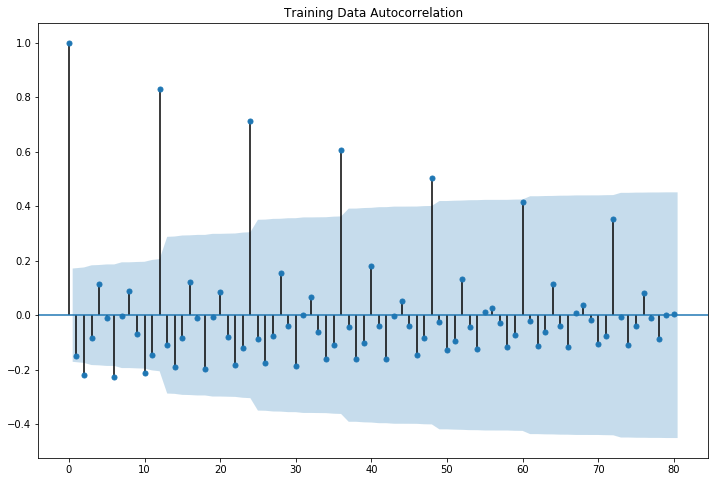

In [145]:
#Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

plot_acf(train.diff().dropna(),title='Training Data Autocorrelation',missing='drop',lags=80);

In [146]:
p = q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [147]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [148]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334678886
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574252763
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.3243908188035
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.528962130763
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981866635
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.9911553666097
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.6565719828475
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.6639234230015
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.1083846679712
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.8594819023838
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1570.855025919573
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1400.6709524136702
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1428.2448811077943
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.6168027963774
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:1402.638588850984
SARIMA(0, 1, 2

In [169]:
SARIMA_AIC.sort_values(by=['AIC']).head(5)

param       seasonal          AIC
47  (1, 1, 2)  (0, 1, 2, 12)  1382.347780
20  (0, 1, 2)  (0, 1, 2, 12)  1382.484254
50  (1, 1, 2)  (1, 1, 2, 12)  1384.137874
74  (2, 1, 2)  (0, 1, 2, 12)  1384.317618
23  (0, 1, 2)  (1, 1, 2, 12)  1384.398867

In [150]:
SARIMA_AIC[SARIMA_AIC.isnull()['AIC'] == True]

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [151]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Sun, 23 Jan 2022   AIC                           1382.348
Time:                                    09:02:28   BIC                           1397.479
Sample:                                01-31-1980   HQIC                          1388.455
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

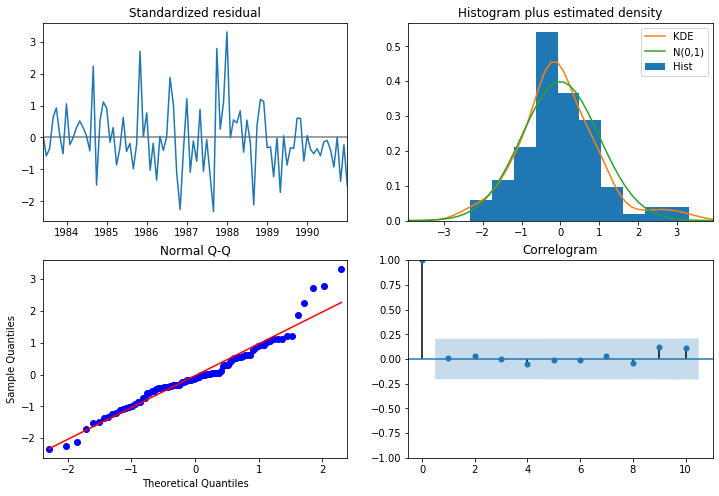

In [152]:
results_auto_SARIMA.plot_diagnostics();

In [153]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [154]:
predicted_auto_SARIMA_AIC = results_auto_SARIMA.forecast(steps=len(test))
predicted_auto_SARIMA_df = test.copy()
predicted_auto_SARIMA_df['SARIMA_AIC'] = predicted_auto_SARIMA_AIC
predicted_auto_SARIMA_df.head()

Sparkling   SARIMA_AIC
Time_Stamp                        
1991-01-31       1902  1460.244625
1991-02-28       2049  1392.437175
1991-03-31       1874  1743.201687
1991-04-30       1279  1650.066938
1991-05-31       1432  1522.656019

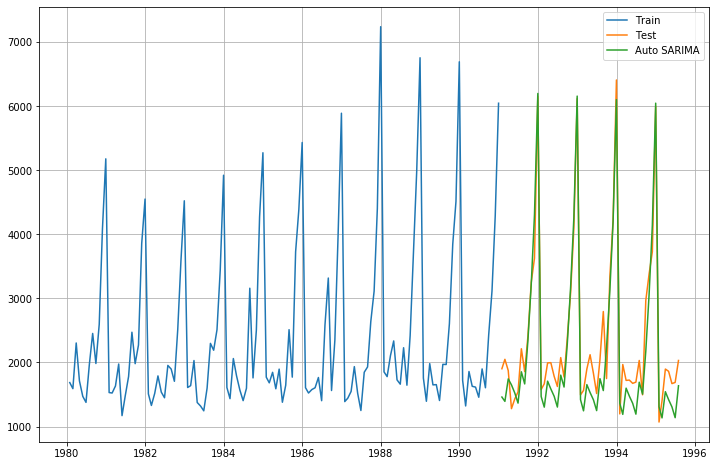

In [155]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_auto_SARIMA_AIC, label='Auto SARIMA')

plt.legend(loc='best')
plt.grid()

In [156]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1460.244625  412.922757     650.930893    2269.558357
1991-02-28  1392.437175  429.721287     550.198929    2234.675420
1991-03-31  1743.201687  430.065852     900.288106    2586.115269
1991-04-30  1650.066938  433.930014     799.579738    2500.554137
1991-05-31  1522.656019  434.242901     671.555573    2373.756466

In [170]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

resultsDf_12 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['AIC_SARIMA(1,1,2)(0,1,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf.to_clipboard()

RMSE: 382.57672191394937 
MAPE: 15.33280868775205


In [158]:
#Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12.

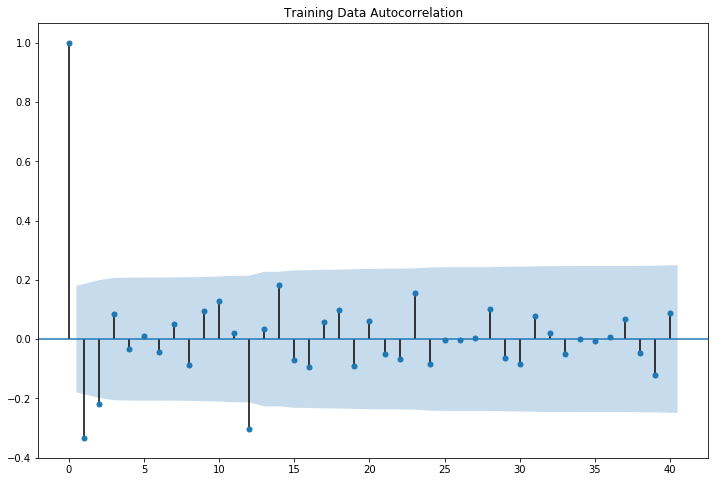

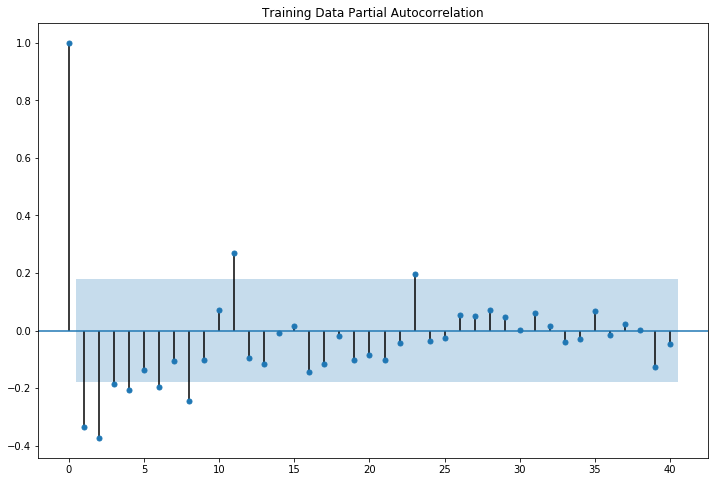

In [159]:
plot_acf((train.diff(12).dropna()).diff().dropna(), lags=40, title='Training Data Autocorrelation',missing='drop')
plot_pacf((train.diff(12).dropna()).diff().dropna(), lags=40, title='Training Data Partial Autocorrelation',method='ywmle');

In [160]:
#Here, we have taken alpha=0.05.

#We are going to take the seasonal period as 12 or its multiple e.g. 24. We are taking the p value to be 4 and the q value to be 2 as the parameters same as the ARIMA model.

#The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
#The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 1.
#Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).

In [161]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -684.793
Date:                            Sun, 23 Jan 2022   AIC                           1387.586
Time:                                    09:04:47   BIC                           1410.283
Sample:                                01-31-1980   HQIC                          1396.747
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4852      0.368     -1.320      0.187      -1.206       0.235
ar.L2          0.0471      0.178   

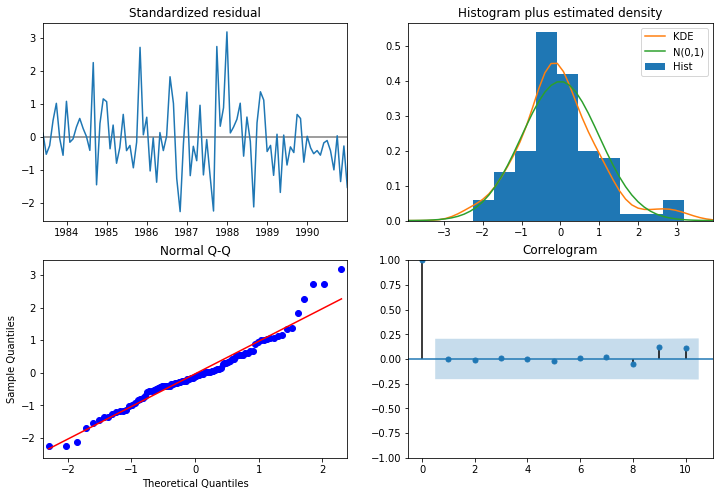

In [162]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [163]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [164]:
predicted_manual_SARIMA_M = results_manual_SARIMA.forecast(steps=len(test))
predicted_manual_SARIMA_df = test.copy()
predicted_manual_SARIMA_df['SARIMA_Manual'] = predicted_manual_SARIMA_M
predicted_manual_SARIMA_df.head()

Sparkling  SARIMA_Manual
Time_Stamp                          
1991-01-31       1902    1456.669483
1991-02-28       2049    1420.653136
1991-03-31       1874    1758.018983
1991-04-30       1279    1714.222896
1991-05-31       1432    1547.741742

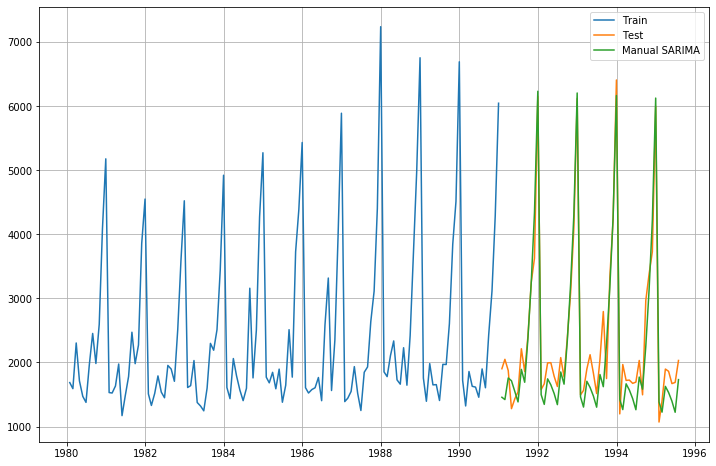

In [165]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_manual_SARIMA_M, label='Manual SARIMA')

plt.legend(loc='best')
plt.grid()

In [166]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
rmse

352.10618909191226

In [171]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

resultsDf_13 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Manual_SARIMA(4,1,2)(0,1,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf.to_clipboard()

RMSE: 352.10618909191226 
MAPE: 13.807343195578953


In [172]:
#Building the most optimum model on the Full Data.

In [173]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sun, 23 Jan 2022   AIC                           2360.826
Time:                                    11:25:53   BIC                           2382.308
Sample:                                01-31-1980   HQIC                          2369.549
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6610      0.242     -2.734      0.006      -1.135      -0.187
ma.L1         -0.1801      0.219   

In [174]:
#Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).

In [175]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)
predicted_manual_SARIMA_full_data

In [176]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1836.385631  379.701588    1092.184194    2580.587067
1995-09-30  2489.574243  384.464512    1736.037645    3243.110841
1995-10-31  3324.583880  384.570241    2570.840058    4078.327703
1995-11-30  4020.216572  386.328458    3263.026709    4777.406435
1995-12-31  6289.987830  386.383000    5532.691065    7047.284594

In [177]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 539.9237221568743


In [178]:
df['Sparkling'].head()

Time_Stamp
1980-01-31    1686
1980-02-29    1591
1980-03-31    2304
1980-04-30    1712
1980-05-31    1471
Name: Sparkling, dtype: int64

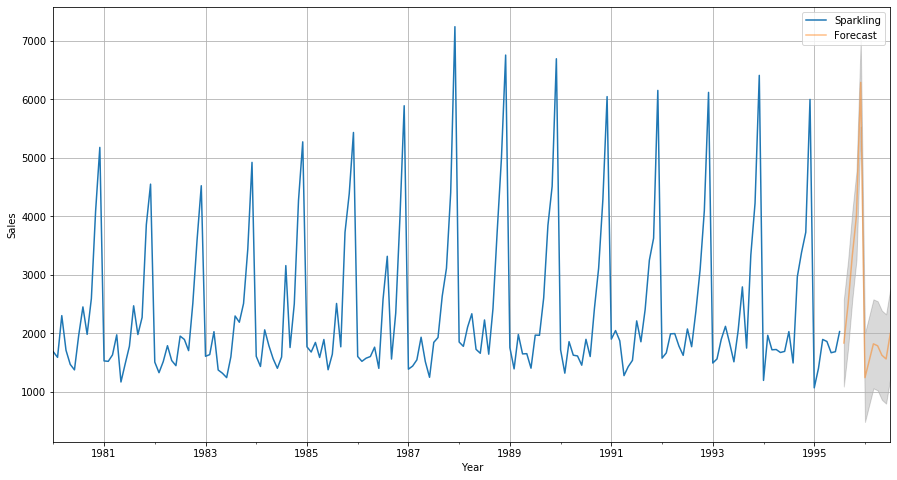

In [179]:
axis = df.plot(label='Actual', figsize=(15,8))
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid();

In [180]:
prediction_1 = results_full_data_model.forecast(steps=12)
prediction_1

1995-08-31    1836.385631
1995-09-30    2489.574243
1995-10-31    3324.583880
1995-11-30    4020.216572
1995-12-31    6289.987830
1996-01-31    1244.691721
1996-02-29    1533.155360
1996-03-31    1821.699915
1996-04-30    1788.496278
1996-05-31    1627.572432
1996-06-30    1563.329301
1996-07-31    2000.705759
Freq: M, dtype: float64

In [186]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(results_full_data_model.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(results_full_data_model.resid,ddof=1)})
pred_2_df.to_clipboard()

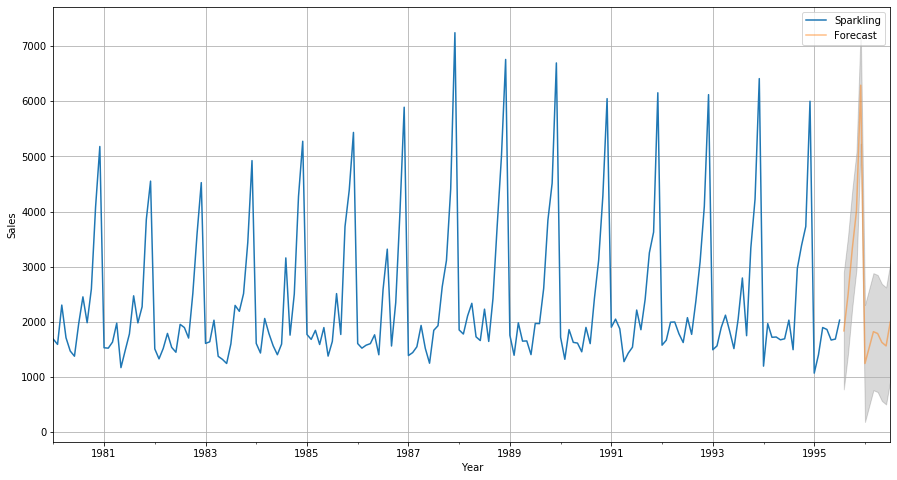

In [182]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [224]:
df_rose= pd.read_csv('Rose.csv')
df_rose.head().to_clipboard()

In [226]:
df_rose.dtypes

YearMonth     object
Rose         float64
dtype: object

In [227]:
df_rose= pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')
df_rose1= pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth', squeeze=True)

In [229]:
df_rose.head().to_clipboard()

In [216]:
df_rose.isnull().sum()

Rose    2
dtype: int64

In [217]:
df_rose.duplicated().sum()

90

In [219]:
df_rose.shape

(187, 1)

In [220]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [221]:
df_rose.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [230]:
df_rose.describe().to_clipboard()

In [231]:
df_rose.dropna(inplace =True)

In [233]:
df_rose.shape

(185, 1)

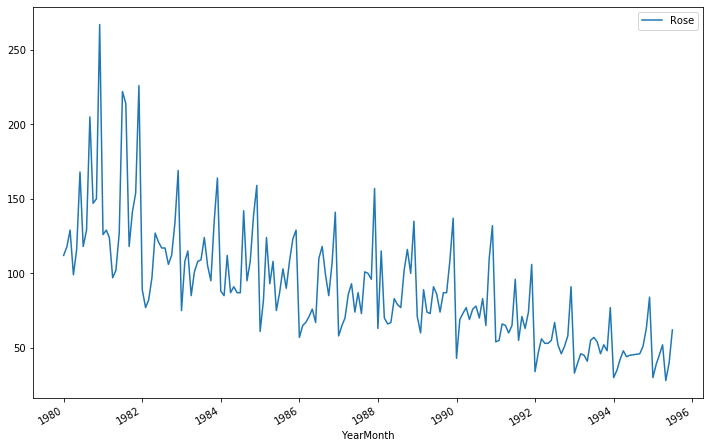

In [203]:
df_rose.plot();
plt.show()

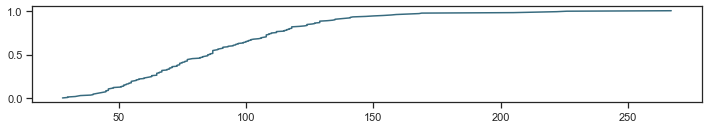

In [204]:
sns.set(style = "ticks") 
c = '#386B7F'
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df_rose['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);

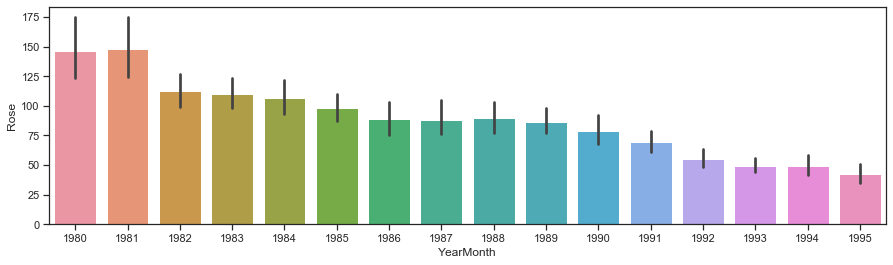

In [205]:
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x=df_rose.index.year, y='Rose', data=df_rose, ax=axis1);

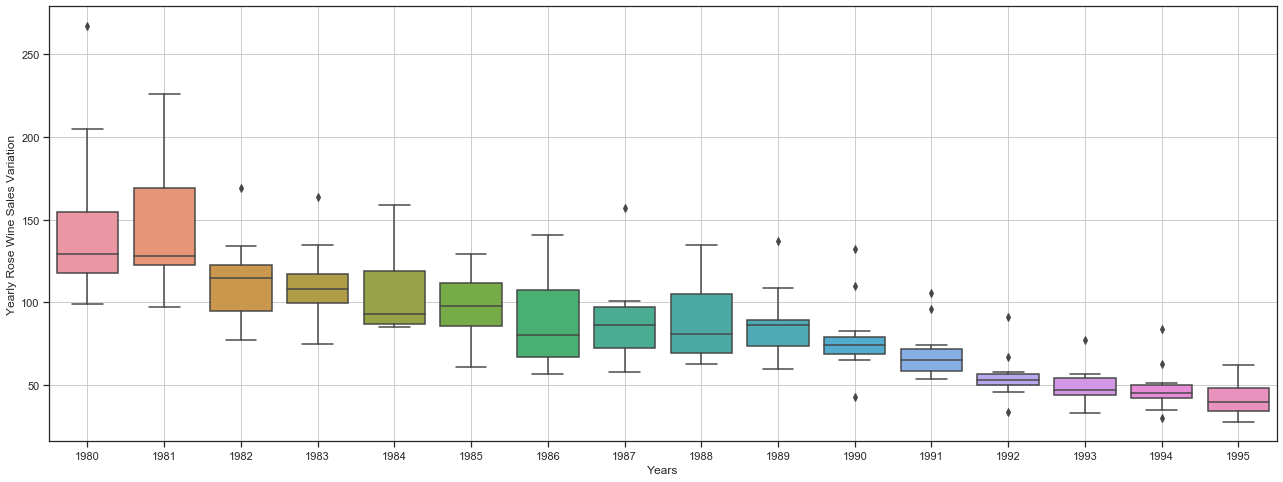

In [206]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_rose1.index.year, y=df_rose1, ax=ax, whis=1.5)
plt.grid()
plt.xlabel('Years')
plt.ylabel('Yearly Rose Wine Sales Variation');

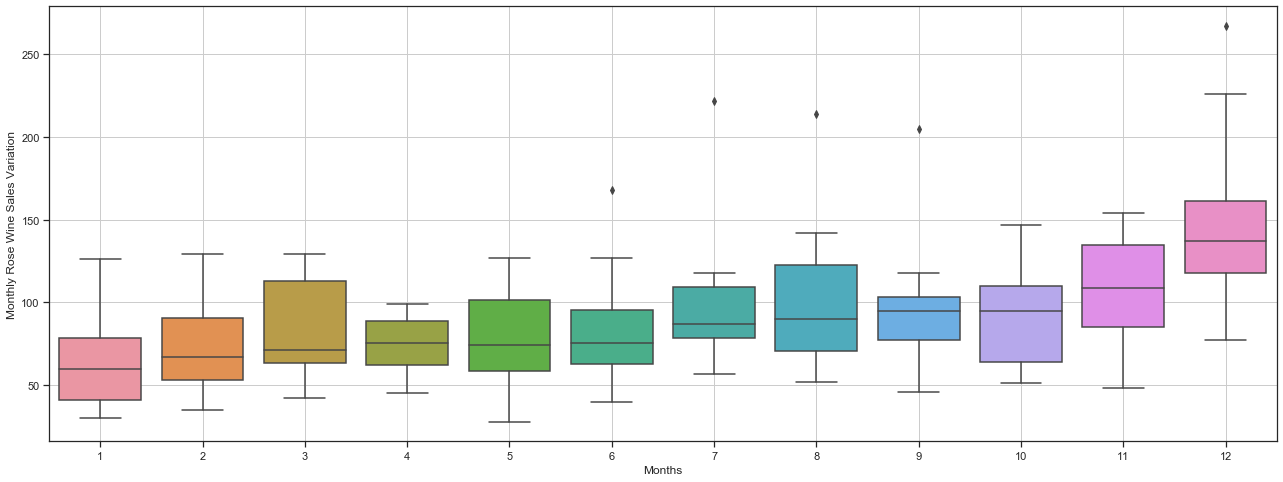

In [207]:
fig,ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df_rose1.index.month,y=df_rose1,ax=ax,whis=1.5)
plt.grid()
plt.xlabel('Months')
plt.ylabel('Monthly Rose Wine Sales Variation');

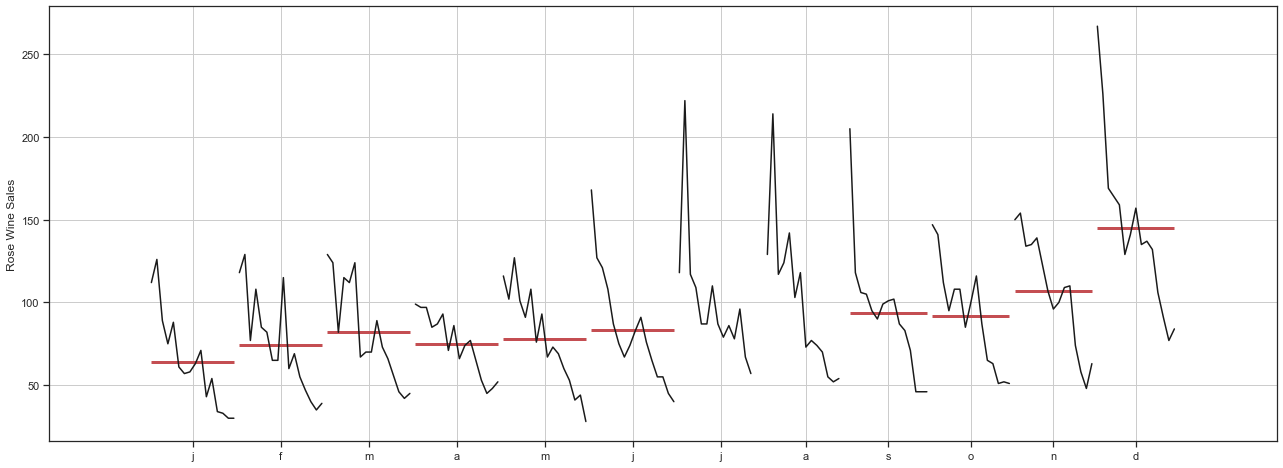

In [208]:
from statsmodels.graphics.tsaplots import month_plot

fig,ax = plt.subplots(figsize=(22,8))

month_plot(df_rose1,ylabel='Rose Wine Sales',ax=ax)
plt.grid();

In [234]:
monthly_sales_across_years_rose = pd.pivot_table(df_rose, values = 'Rose', columns=df_rose.index.month, index=df_rose.index.year)
monthly_sales_across_years_rose.to_clipboard()

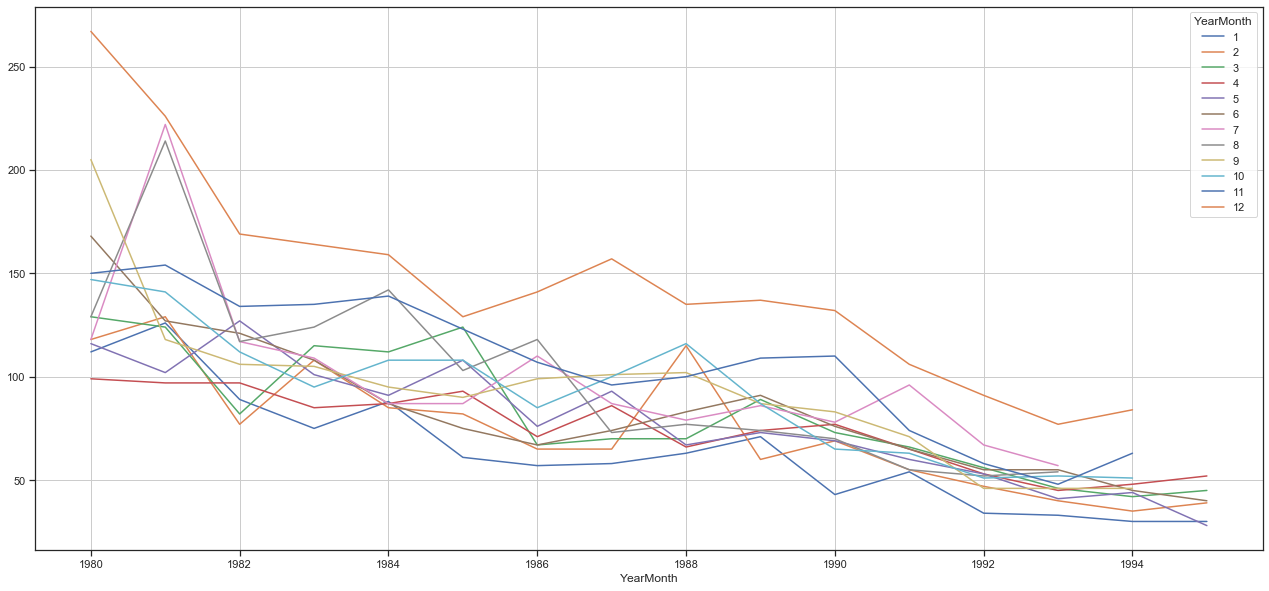

In [210]:
fig,ax = plt.subplots(figsize=(22,10))
monthly_sales_across_years_rose.plot(ax=ax)
plt.grid();

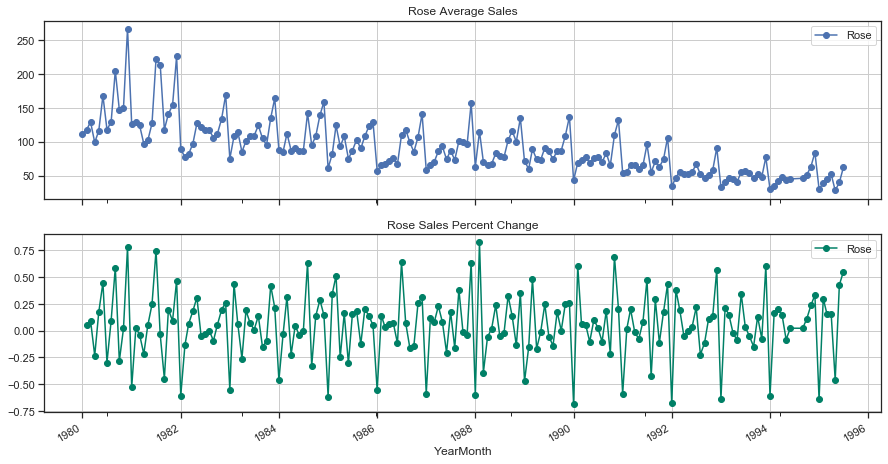

In [211]:
average    = df_rose.groupby(df_rose.index)["Rose"].mean()
pct_change = df_rose.groupby(df_rose.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot Rose wine average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Rose Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot Rose wine precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percent Change",grid=True)

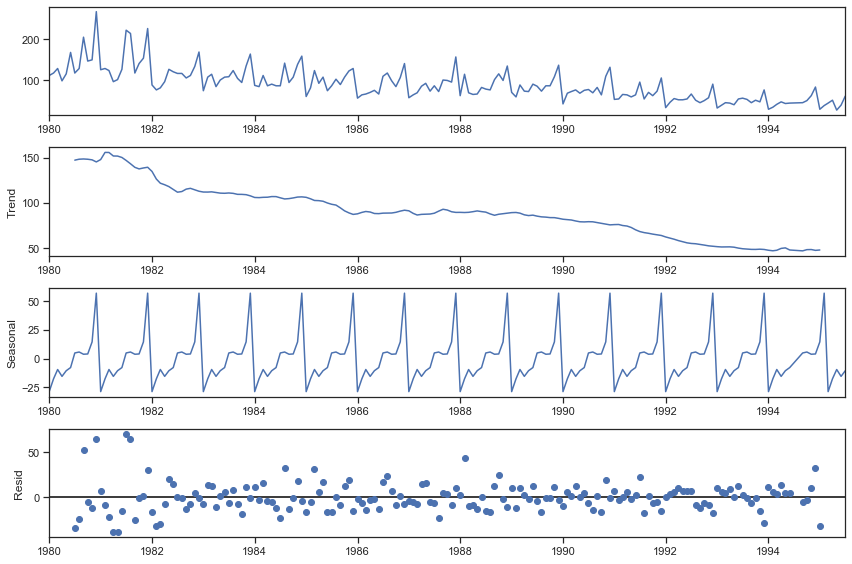

In [235]:
df_rose_add_decompose = seasonal_decompose(df_rose, model = 'additive', period= 12)
df_rose_add_decompose.plot()
plt.show()

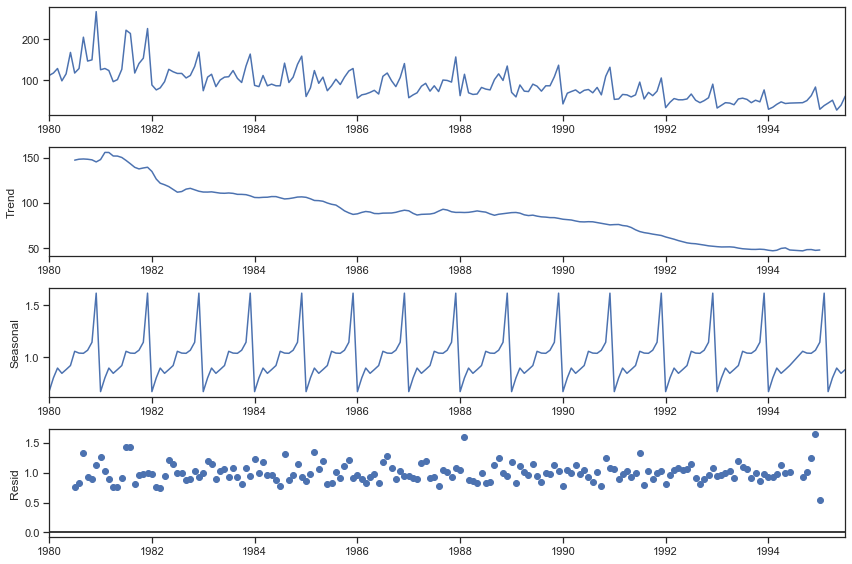

In [236]:
df_rose_mul_decompose = seasonal_decompose(df_rose, model = 'multiplicative', period= 12)
df_rose_mul_decompose.plot()
plt.show()

In [237]:
train_rose = df_rose[df_rose.index<'1991'] 
test_rose = df_rose[df_rose.index>='1991']

In [238]:
df_rose.shape

(185, 1)

In [239]:
print(train_rose.shape)
print(test_rose.shape)

(132, 1)
(53, 1)


In [240]:
print('First few rows of Training Data for Rose')
display(train_rose.head())
print('Last few rows of Training Data for Rose')
display(train_rose.tail())
print('First few rows of Test Data Rose')
display(test_rose.head())
print('Last few rows of Test Data Rose')
display(test_rose.tail())

First few rows of Training Data for Rose


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data for Rose


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data Rose


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Test Data Rose


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

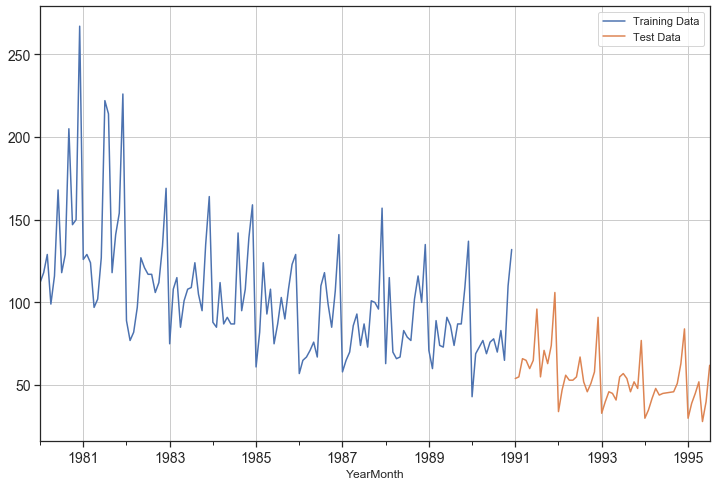

In [241]:
train_rose['Rose'].plot(fontsize=14)
test_rose['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [242]:
train_time_rose = [i+1 for i in range(len(train_rose))]
test_time_rose = [i+1+len(train_rose) for i in range(len(test_rose))]
print('Training Time instance Rose','\n',train_time_rose)
print('Test Time instance Rose','\n',test_time_rose)

Training Time instance Rose 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance Rose 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185]


In [243]:
LinearRegression_train_rose = train_rose.copy()
LinearRegression_test_rose = test_rose.copy()

LinearRegression_train_rose['time'] = train_time_rose
LinearRegression_test_rose['time'] = test_time_rose

In [244]:
LinearRegression_train_rose.head()

Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

In [245]:
lr = LinearRegression()

In [246]:
lr.fit(LinearRegression_train_rose[['time']],LinearRegression_train_rose['Rose'])

LinearRegression()

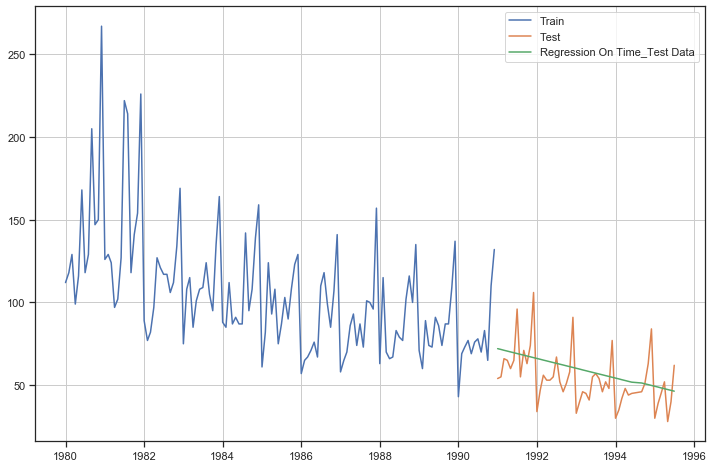

In [247]:
train_predictions_model_rose = lr.predict(LinearRegression_train_rose[['time']])
LinearRegression_train_rose['RegOnTime'] = train_predictions_model_rose

test_predictions_model_rose = lr.predict(LinearRegression_test_rose[['time']])
LinearRegression_test_rose['RegOnTime'] = test_predictions_model_rose

plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [248]:
LinearRegression_test_rose.head()

Rose  time  RegOnTime
YearMonth                        
1991-01-01  54.0   133  72.063266
1991-02-01  55.0   134  71.568888
1991-03-01  66.0   135  71.074511
1991-04-01  65.0   136  70.580133
1991-05-01  60.0   137  70.085755

In [249]:
rmse_model1_test_rose = mean_squared_error(test_rose['Rose'],test_predictions_model_rose,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test_rose))
resultsDf1_rose = pd.DataFrame({'Test RMSE': [rmse_model1_test_rose]},index=['RegressionOnTime'])
resultsDf1_rose

For RegressionOnTime forecast on the Test Data,  RMSE is 15.507 


Test RMSE
RegressionOnTime  15.506708

In [250]:
NaiveModel_train_rose = train_rose.copy()
NaiveModel_test_rose = test_rose.copy()

NaiveModel_test_rose['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_test_rose.head()

Rose  naive
YearMonth              
1991-01-01  54.0  132.0
1991-02-01  55.0  132.0
1991-03-01  66.0  132.0
1991-04-01  65.0  132.0
1991-05-01  60.0  132.0

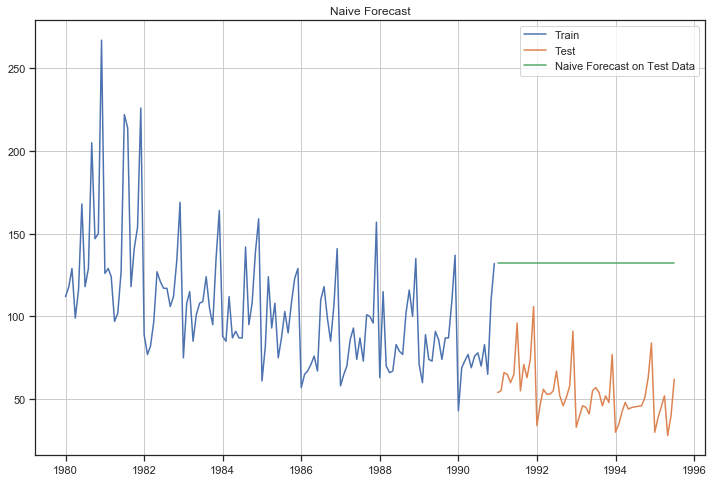

In [251]:
plt.plot(NaiveModel_train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')

plt.plot(NaiveModel_test_rose['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [253]:
rmse_model2_test_rose = mean_squared_error(test_rose['Rose'],NaiveModel_test_rose['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test_rose))

resultsDf2_rose = pd.DataFrame({'Test RMSE': [rmse_model2_test_rose]},index=['NaiveModel'])

resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf2_rose])
resultsDf1_rose

For RegressionOnTime forecast on the Test Data,  RMSE is 79.452


Test RMSE
RegressionOnTime  15.506708
NaiveModel        79.451540
NaiveModel        79.451540

In [254]:
SimpleAverage_train_rose = train_rose.copy()
SimpleAverage_test_rose = test_rose.copy()

SimpleAverage_test_rose['mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_test_rose.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

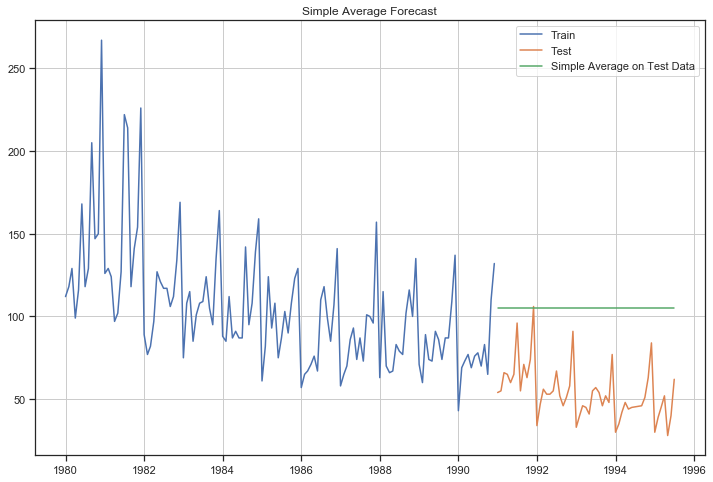

In [255]:
plt.plot(SimpleAverage_train_rose['Rose'], label='Train')
plt.plot(SimpleAverage_test_rose['Rose'], label='Test')

plt.plot(SimpleAverage_test_rose['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [256]:
rmse_model3_test_rose = mean_squared_error(test_rose['Rose'],SimpleAverage_test_rose['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test_rose))

resultsDf3_rose = pd.DataFrame({'Test RMSE': [rmse_model3_test_rose]}
                           ,index=['SimpleAverageModel'])

resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf3_rose])
resultsDf1_rose

For Simple Average forecast on the Test Data,  RMSE is 53.222


Test RMSE
RegressionOnTime    15.506708
NaiveModel          79.451540
NaiveModel          79.451540
SimpleAverageModel  53.221795

In [257]:
MovingAverage_rose = df_rose.copy()
MovingAverage_rose.head()

MovingAverage_rose['Trailing_2_rose'] = MovingAverage_rose['Rose'].rolling(2).mean()
MovingAverage_rose['Trailing_3_rose'] = MovingAverage_rose['Rose'].rolling(3).mean()
MovingAverage_rose['Trailing_4_rose'] = MovingAverage_rose['Rose'].rolling(4).mean()
MovingAverage_rose['Trailing_6_rose'] = MovingAverage_rose['Rose'].rolling(6).mean()

MovingAverage_rose.head()

Rose  Trailing_2_rose  Trailing_3_rose  Trailing_4_rose  \
YearMonth                                                              
1980-01-01  112.0              NaN              NaN              NaN   
1980-02-01  118.0            115.0              NaN              NaN   
1980-03-01  129.0            123.5       119.666667              NaN   
1980-04-01   99.0            114.0       115.333333            114.5   
1980-05-01  116.0            107.5       114.666667            115.5   

            Trailing_6_rose  
YearMonth                    
1980-01-01              NaN  
1980-02-01              NaN  
1980-03-01              NaN  
1980-04-01              NaN  
1980-05-01              NaN

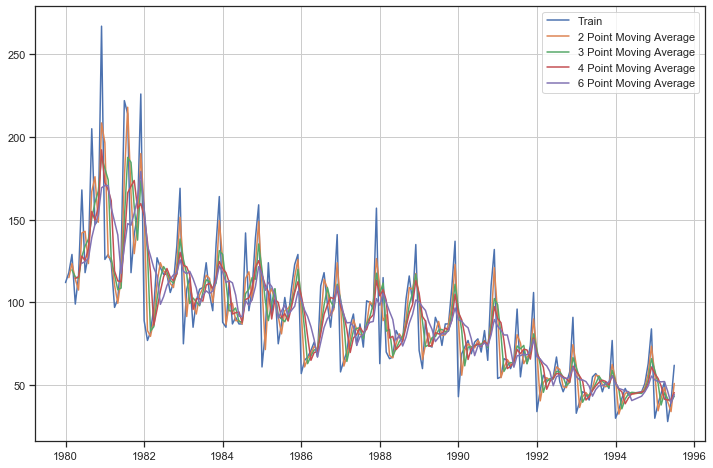

In [258]:
plt.plot(MovingAverage_rose['Rose'], label='Train')
plt.plot(MovingAverage_rose['Trailing_2_rose'], label='2 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_3_rose'], label='3 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_4_rose'],label = '4 Point Moving Average')
plt.plot(MovingAverage_rose['Trailing_6_rose'],label = '6 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [259]:
trailing_MovingAverage_train_rose = MovingAverage_rose[MovingAverage_rose.index<'1991'] 
trailing_MovingAverage_test_rose = MovingAverage_rose[MovingAverage_rose.index>='1991']

In [260]:
print('First few rows of Training Data')
display(trailing_MovingAverage_train_rose.head())
print('Last few rows of Training Data')
display(trailing_MovingAverage_train_rose.tail())
print('First few rows of Test Data')
display(trailing_MovingAverage_test_rose.head())
print('Last few rows of Test Data')
display(trailing_MovingAverage_test_rose.tail())

First few rows of Training Data


Rose  Trailing_2_rose  Trailing_3_rose  Trailing_4_rose  \
YearMonth                                                              
1980-01-01  112.0              NaN              NaN              NaN   
1980-02-01  118.0            115.0              NaN              NaN   
1980-03-01  129.0            123.5       119.666667              NaN   
1980-04-01   99.0            114.0       115.333333            114.5   
1980-05-01  116.0            107.5       114.666667            115.5   

            Trailing_6_rose  
YearMonth                    
1980-01-01              NaN  
1980-02-01              NaN  
1980-03-01              NaN  
1980-04-01              NaN  
1980-05-01              NaN

Last few rows of Training Data


Rose  Trailing_2_rose  Trailing_3_rose  Trailing_4_rose  \
YearMonth                                                              
1990-08-01   70.0             74.0        74.666667            73.25   
1990-09-01   83.0             76.5        77.000000            76.75   
1990-10-01   65.0             74.0        72.666667            74.00   
1990-11-01  110.0             87.5        86.000000            82.00   
1990-12-01  132.0            121.0       102.333333            97.50   

            Trailing_6_rose  
YearMonth                    
1990-08-01        73.833333  
1990-09-01        75.500000  
1990-10-01        73.500000  
1990-11-01        80.333333  
1990-12-01        89.666667

First few rows of Test Data


Rose  Trailing_2_rose  Trailing_3_rose  Trailing_4_rose  \
YearMonth                                                             
1991-01-01  54.0             93.0        98.666667            90.25   
1991-02-01  55.0             54.5        80.333333            87.75   
1991-03-01  66.0             60.5        58.333333            76.75   
1991-04-01  65.0             65.5        62.000000            60.00   
1991-05-01  60.0             62.5        63.666667            61.50   

            Trailing_6_rose  
YearMonth                    
1991-01-01        85.666667  
1991-02-01        83.166667  
1991-03-01        80.333333  
1991-04-01        80.333333  
1991-05-01        72.000000

Last few rows of Test Data


Rose  Trailing_2_rose  Trailing_3_rose  Trailing_4_rose  \
YearMonth                                                             
1995-03-01  45.0             42.0        38.000000            49.50   
1995-04-01  52.0             48.5        45.333333            41.50   
1995-05-01  28.0             40.0        41.666667            41.00   
1995-06-01  40.0             34.0        40.000000            41.25   
1995-07-01  62.0             51.0        43.333333            45.50   

            Trailing_6_rose  
YearMonth                    
1995-03-01        52.000000  
1995-04-01        52.166667  
1995-05-01        46.333333  
1995-06-01        39.000000  
1995-07-01        44.333333

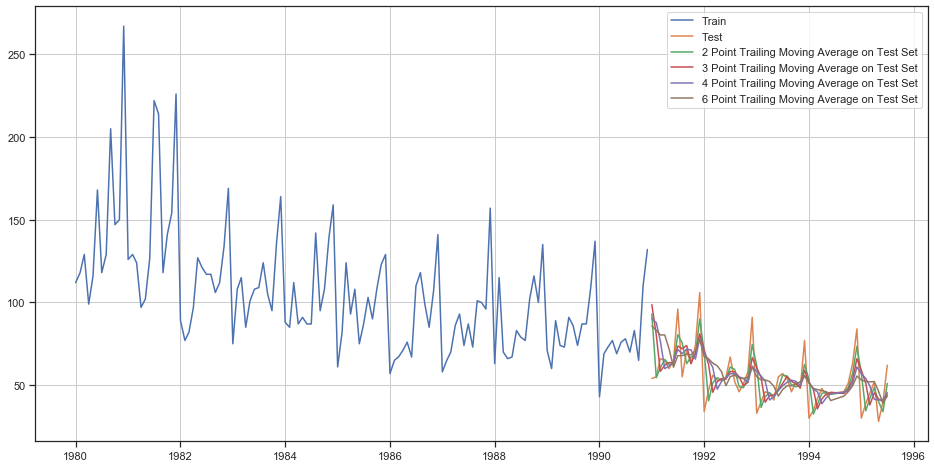

In [261]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_rose['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test_rose['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test_rose['Trailing_2_rose'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_3_rose'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_4_rose'],label = '4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_6_rose'],label = '6 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [262]:
rmse_model4_test_2_rose = mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_2_rose'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2_rose))

## Test Data - RMSE --> 3 point Trailing MA

rmse_model4_test_3_rose = mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_3_rose'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3_rose))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4_rose = mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_4_rose'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4_rose))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6_rose = mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_6_rose'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6_rose))

resultsDf4_rose = pd.DataFrame({'Test RMSE': [rmse_model4_test_2_rose,rmse_model4_test_3_rose
                                          ,rmse_model4_test_4_rose,rmse_model4_test_6_rose]}
                           ,index=['2pointTrailingMovingAverage','3pointTrailingMovingAverage'
                                   ,'4pointTrailingMovingAverage','6pointTrailingMovingAverage'])

resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf4_rose])
resultsDf1_rose

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.745
For 3 point Moving Average Model forecast on the Training Data,  RMSE is 14.392
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.726
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.847


Test RMSE
RegressionOnTime             15.506708
NaiveModel                   79.451540
NaiveModel                   79.451540
SimpleAverageModel           53.221795
2pointTrailingMovingAverage  11.744931
3pointTrailingMovingAverage  14.391938
4pointTrailingMovingAverage  14.726316
6pointTrailingMovingAverage  14.846842

In [267]:
model_SES_rose = SimpleExpSmoothing(train_rose)
model_SES_autofit_rose = model_SES_rose.fit(optimized=True)
model_SES_autofit_rose.params

{'smoothing_level': 0.09874976263905368,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38751258560546,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [268]:
SES_predict_df_rose = test_rose.copy()
SES_predict_rose = model_SES_autofit_rose.forecast(steps=len(test_rose))
SES_predict_df_rose['SES'] = model_SES_autofit_rose.forecast(steps=len(test_rose))
SES_predict_df_rose.head()

Rose        SES
YearMonth                  
1991-01-01  54.0  87.104995
1991-02-01  55.0  87.104995
1991-03-01  66.0  87.104995
1991-04-01  65.0  87.104995
1991-05-01  60.0  87.104995

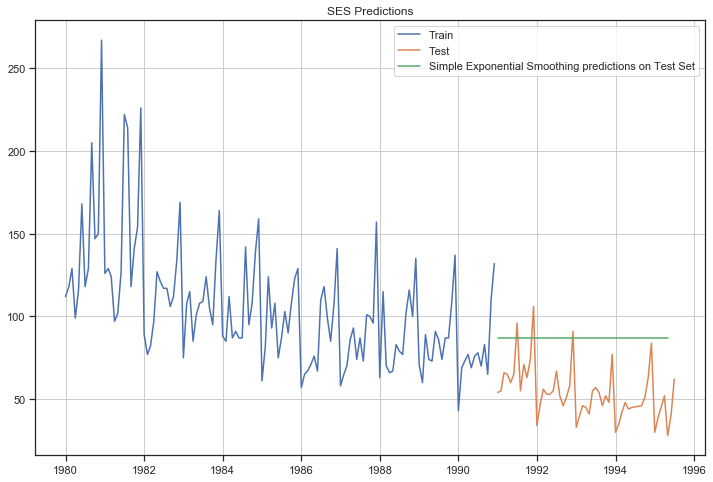

In [269]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(SES_predict_rose, label='Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('SES Predictions');

In [270]:
print('SES RMSE:',mean_squared_error(test_rose.values,SES_predict_rose.values,squared=False))
resultsDf5_rose = pd.DataFrame({'Test RMSE': [mean_squared_error(test_rose.values,SES_predict_rose.values,squared=False)]},index=['SES'])
resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf5_rose])
resultsDf1_rose

SES RMSE: 36.602394021088855


Test RMSE
RegressionOnTime             15.506708
NaiveModel                   79.451540
NaiveModel                   79.451540
SimpleAverageModel           53.221795
2pointTrailingMovingAverage  11.744931
3pointTrailingMovingAverage  14.391938
4pointTrailingMovingAverage  14.726316
6pointTrailingMovingAverage  14.846842
SES                          36.602394

In [285]:
DES_train = train_rose.copy()
DES_test = test_rose.copy()

In [287]:
model_DES = Holt(DES_train['Rose'])
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

{'smoothing_level': 0.15789473684210525,
 'smoothing_slope': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 112.0,
 'initial_slope': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [288]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  86.863579
1991-02-01  55.0  88.028056
1991-03-01  66.0  89.192534
1991-04-01  65.0  90.357011
1991-05-01  60.0  91.521488

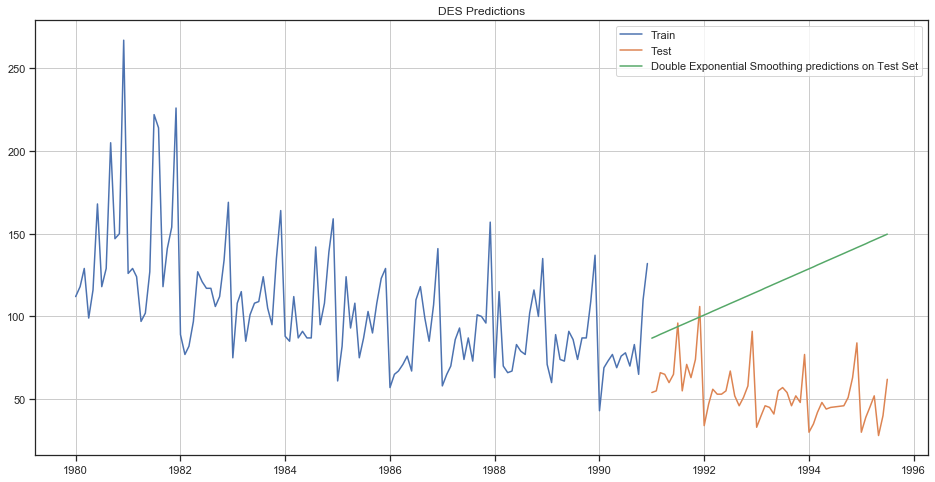

In [290]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('DES Predictions');

In [278]:
DES_predict_df_rose = train_rose.copy()
DES_predict_rose = model_DES_rose.forecast(steps=len(test_rose))
DES_predict_df_rose['DES'] = model_DES_rose.forecast(steps=len(test_rose))
DES_predict_df_rose.head()

Rose  DES
YearMonth             
1980-01-01  112.0  NaN
1980-02-01  118.0  NaN
1980-03-01  129.0  NaN
1980-04-01   99.0  NaN
1980-05-01  116.0  NaN

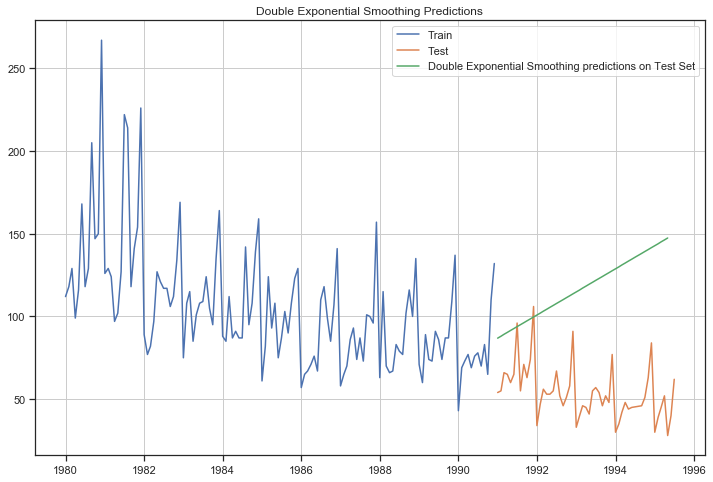

In [279]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(DES_predict_rose, label='Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions');

In [275]:
print('DES RMSE:',mean_squared_error(test_rose.values,DES_predict_rose.values,squared=False))

resultsDf6_rose = pd.DataFrame({'Test RMSE': [mean_squared_error(test_rose.values,DES_predict_rose.values,squared=False)]}
                           ,index=['DES'])

resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf6_rose])
resultsDf1_rose

DES RMSE: 69.03888162726557


Test RMSE
RegressionOnTime             15.506708
NaiveModel                   79.451540
NaiveModel                   79.451540
SimpleAverageModel           53.221795
2pointTrailingMovingAverage  11.744931
3pointTrailingMovingAverage  14.391938
4pointTrailingMovingAverage  14.726316
6pointTrailingMovingAverage  14.846842
SES                          36.602394
DES                          69.038882

In [281]:
model_TES_rose = ExponentialSmoothing(train_rose,trend='additive',seasonal='additive')
# Fitting the model
model_TES_rose = model_TES_rose.fit()

model_TES_rose.params

{'smoothing_level': 0.13346419155496156,
 'smoothing_slope': 0.013799003011050462,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 77.88760840203805,
 'initial_slope': 0.0,
 'initial_seasons': array([ 37.22512664,  49.55914984,  57.49063909,  46.84824177,
         55.60691281,  61.03952791,  70.96491019,  76.99009393,
         73.00798464,  71.11386606,  89.18174761, 131.39710677]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [282]:
TES_predict_rose =  model_TES_rose.forecast(len(test_rose))
TES_predict_rose.head()

1991-01-01    44.139564
1991-02-01    56.077991
1991-03-01    63.613884
1991-04-01    52.575891
1991-05-01    60.938966
Freq: MS, dtype: float64

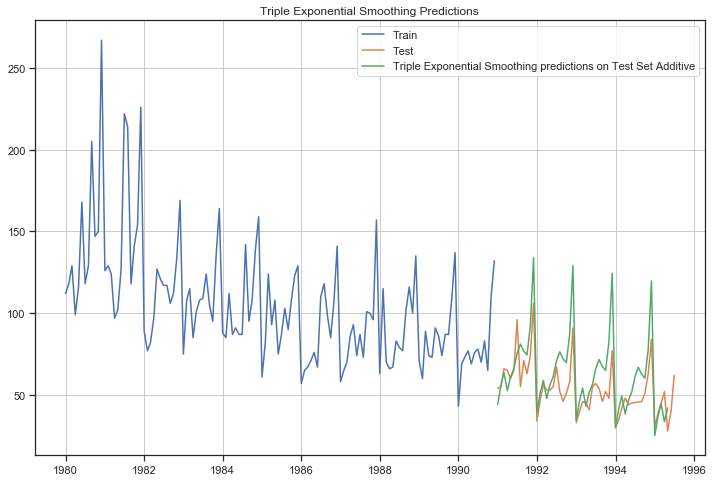

In [283]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(TES_predict_rose, label='Triple Exponential Smoothing predictions on Test Set Additive')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [291]:
print('TES RMSE:',mean_squared_error(test_rose.values,TES_predict_rose.values,squared=False))
resultsDf7_rose = pd.DataFrame({'Test RMSE': [mean_squared_error(test_rose.values,TES_predict_rose.values,squared=False)]}
                           ,index=['TES_Add'])

resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf7_rose])
resultsDf1_rose

TES RMSE: 20.771730726286368


Test RMSE
RegressionOnTime             15.506708
NaiveModel                   79.451540
NaiveModel                   79.451540
SimpleAverageModel           53.221795
2pointTrailingMovingAverage  11.744931
3pointTrailingMovingAverage  14.391938
4pointTrailingMovingAverage  14.726316
6pointTrailingMovingAverage  14.846842
SES                          36.602394
DES                          69.038882
TES_Add                      20.771731

In [293]:
model_TES_am_rose = ExponentialSmoothing(train_rose,trend='add',seasonal='multiplicative')
# Fitting the model
model_TES_am_rose = model_TES_am_rose.fit()

model_TES_am_rose.params

{'smoothing_level': 0.1060963216313948,
 'smoothing_slope': 0.04843849811887955,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565108581343,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550255, 1.65927136, 1.80572635, 1.58888816, 1.77822697,
        1.92604355, 2.11649447, 2.25135196, 2.11690577, 2.08112826,
        2.40927271, 3.30448121]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [299]:
TES_predict_am_rose =  model_TES_am_rose.forecast(len(test_rose))
TES_predict_am_rose.head()

1991-01-01    56.674335
1991-02-01    63.471274
1991-03-01    68.788792
1991-04-01    60.277826
1991-05-01    67.180379
Freq: MS, dtype: float64

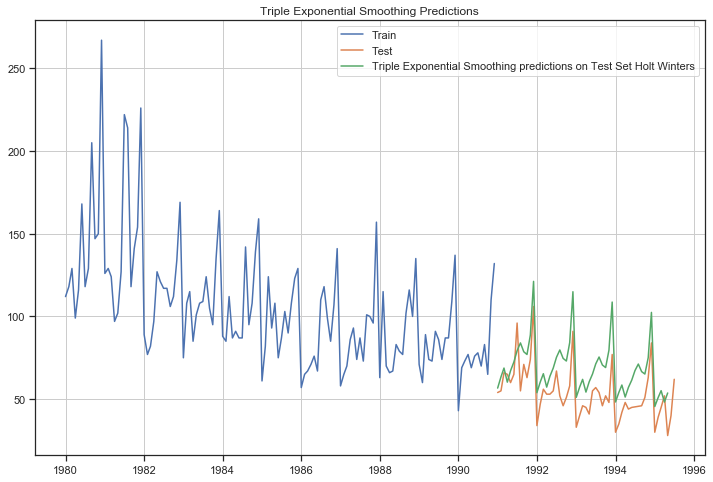

In [300]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(TES_predict_am_rose, label='Triple Exponential Smoothing predictions on Test Set Holt Winters')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [301]:
print('TES_am RMSE:',mean_squared_error(test_rose.values,TES_predict_am_rose.values,squared=False))

resultsDf8_rose = pd.DataFrame({'Test RMSE': [mean_squared_error(test_rose.values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['TES_Add_Mul'])

resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf8_rose])
resultsDf1_rose

TES_am RMSE: 19.91658080074349


Test RMSE
RegressionOnTime             15.506708
NaiveModel                   79.451540
NaiveModel                   79.451540
SimpleAverageModel           53.221795
2pointTrailingMovingAverage  11.744931
3pointTrailingMovingAverage  14.391938
4pointTrailingMovingAverage  14.726316
6pointTrailingMovingAverage  14.846842
SES                          36.602394
DES                          69.038882
TES_Add                      20.771731
TES_Add_Mul                  19.916581

In [303]:
model_TES_mm_rose = ExponentialSmoothing(train_rose,trend='multiplicative',seasonal='multiplicative')
# Fitting the model
model_TES_mm_rose = model_TES_mm_rose.fit()

model_TES_mm_rose.params

{'smoothing_level': 0.0699773504936336,
 'smoothing_slope': 3.4486598091050817e-18,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65475181082856,
 'initial_slope': 0.9939059043685701,
 'initial_seasons': array([1.4524715 , 1.64401816, 1.79897871, 1.57420499, 1.76942144,
        1.90969487, 2.10120743, 2.24519705, 2.1142589 , 2.07332592,
        2.4162356 , 3.31040422]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [304]:
TES_predict_mm_rose =  model_TES_mm_rose.forecast(len(test_rose))
TES_predict_mm_rose.head()

1991-01-01    54.023562
1991-02-01    60.775351
1991-03-01    66.098585
1991-04-01    57.487403
1991-05-01    64.222612
Freq: MS, dtype: float64

In [305]:
TES_predict_df_rose = test_rose.copy()
TES_predict_df_rose['TES_Additive'] = TES_predict_rose
TES_predict_df_rose['TES_HoltWinters'] = TES_predict_am_rose
TES_predict_df_rose['TES_Multiplicative'] = TES_predict_mm_rose
TES_predict_df_rose.head()

Rose  TES_Additive  TES_HoltWinters  TES_Multiplicative
YearMonth                                                          
1991-01-01  54.0     44.139564        56.674335           54.023562
1991-02-01  55.0     56.077991        63.471274           60.775351
1991-03-01  66.0     63.613884        68.788792           66.098585
1991-04-01  65.0     52.575891        60.277826           57.487403
1991-05-01  60.0     60.938966        67.180379           64.222612

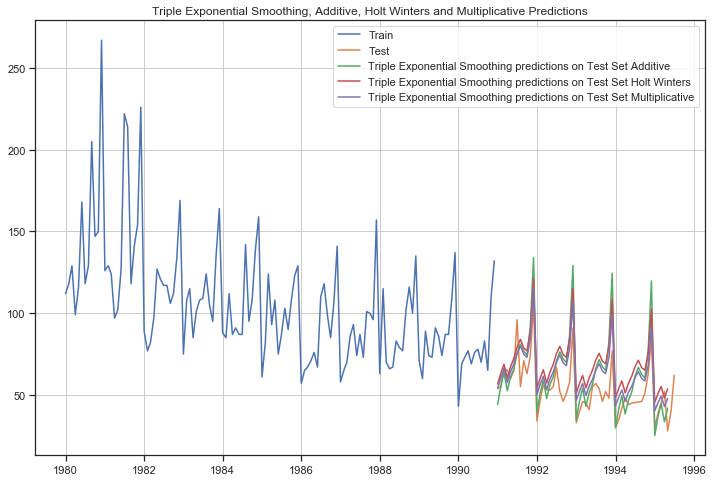

In [306]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(TES_predict_rose, label='Triple Exponential Smoothing predictions on Test Set Additive')
plt.plot(TES_predict_am_rose, label='Triple Exponential Smoothing predictions on Test Set Holt Winters')
plt.plot(TES_predict_mm_rose, label='Triple Exponential Smoothing predictions on Test Set Multiplicative')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing, Additive, Holt Winters and Multiplicative Predictions');

In [309]:
print('TES_mm RMSE:',mean_squared_error(test_rose.values,TES_predict_mm_rose.values,squared=False))

resultsDf9_rose = pd.DataFrame({'Test RMSE': [mean_squared_error(test_rose.values,TES_predict_mm_rose.values,squared=False)]}
                           ,index=['TES_Mul_Mul'])

resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf9_rose])
resultsDf1_rose.to_clipboard()

TES_mm RMSE: 15.857890140804871


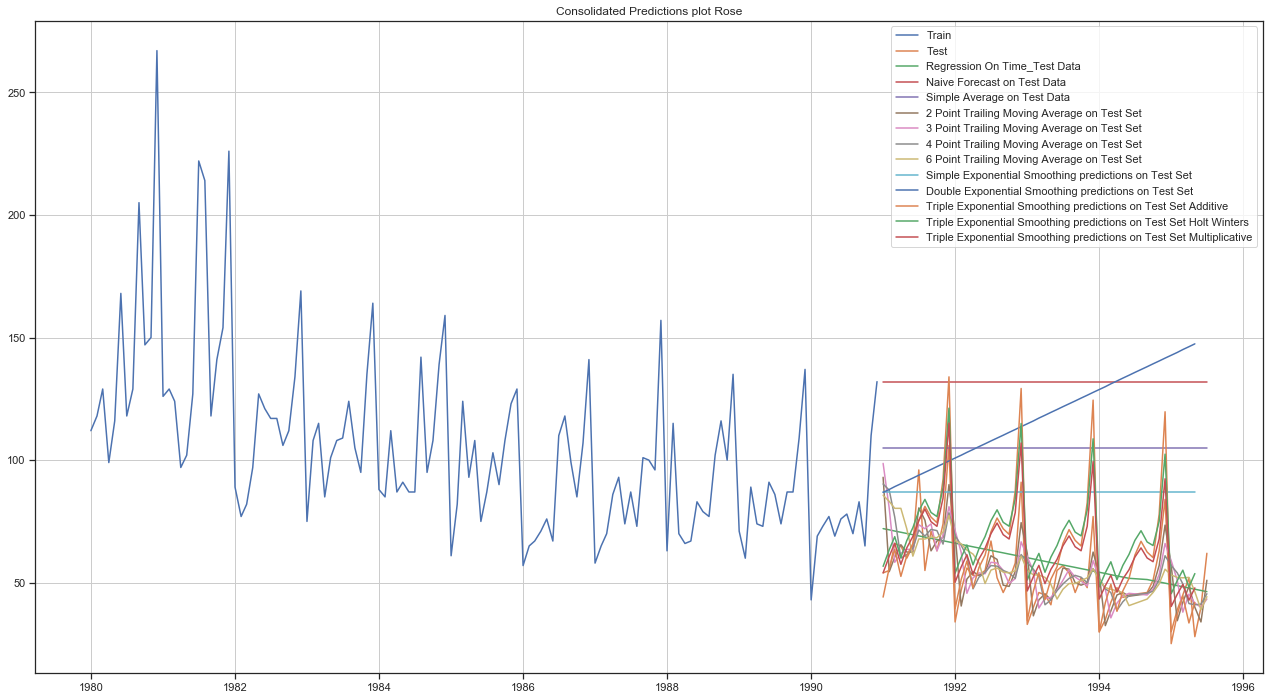

In [308]:
plt.figure(figsize=(22,12))
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test_rose['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test_rose['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test_rose['Trailing_2_rose'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_3_rose'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_4_rose'],label = '4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_6_rose'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(SES_predict_rose, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_rose, label='Triple Exponential Smoothing predictions on Test Set Additive')
plt.plot(TES_predict_am_rose, label='Triple Exponential Smoothing predictions on Test Set Holt Winters')
plt.plot(TES_predict_mm_rose, label='Triple Exponential Smoothing predictions on Test Set Multiplicative')

plt.legend(loc='best')
plt.grid()
plt.title('Consolidated Predictions plot Rose');

In [310]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

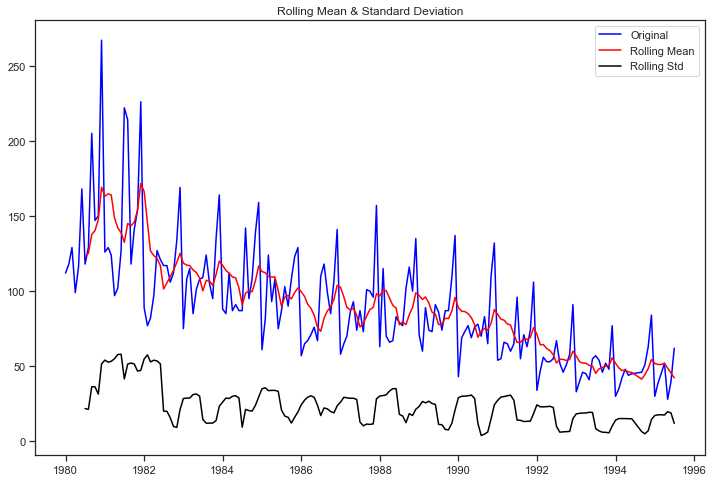

Results of Dickey-Fuller Test:
Test Statistic                  -1.838033
p-value                          0.361750
#Lags Used                      13.000000
Number of Observations Used    171.000000
Critical Value (1%)             -3.469181
Critical Value (5%)             -2.878595
Critical Value (10%)            -2.575863
dtype: float64 



In [313]:
test_stationarity(df_rose['Rose'])

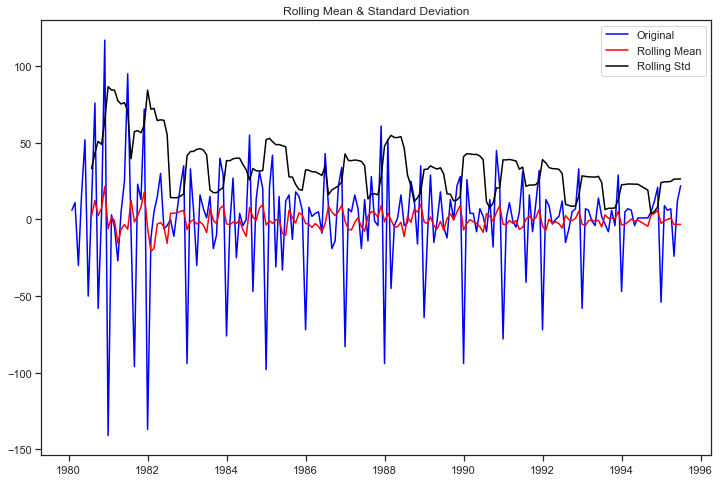

Results of Dickey-Fuller Test:
Test Statistic                -8.167161e+00
p-value                        8.819858e-13
#Lags Used                     1.200000e+01
Number of Observations Used    1.710000e+02
Critical Value (1%)           -3.469181e+00
Critical Value (5%)           -2.878595e+00
Critical Value (10%)          -2.575863e+00
dtype: float64 



In [315]:
test_stationarity(df_rose['Rose'].diff().dropna())

In [ ]:
print(train_rose.shape)
print(test_rose.shape)

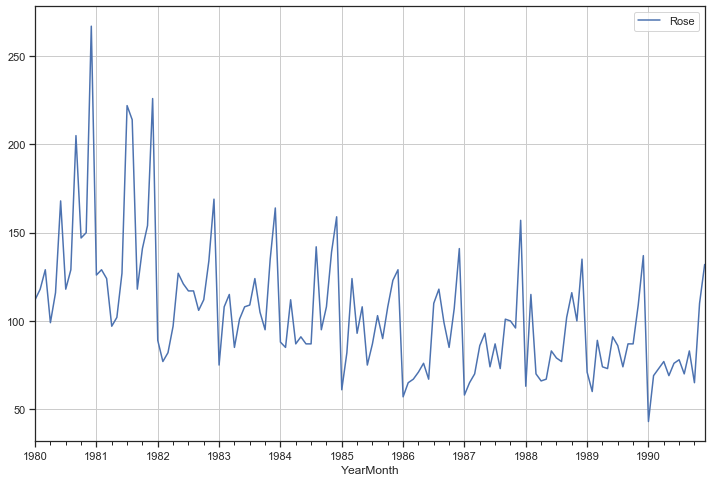

In [318]:
train_rose.plot(grid=True);

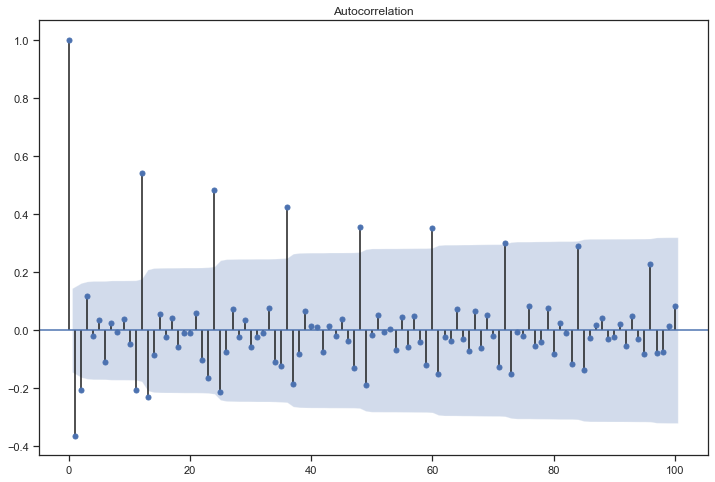

In [317]:
# Autocorrelation plot

plot_acf(df_rose.diff().dropna(),alpha=0.05,lags=100);

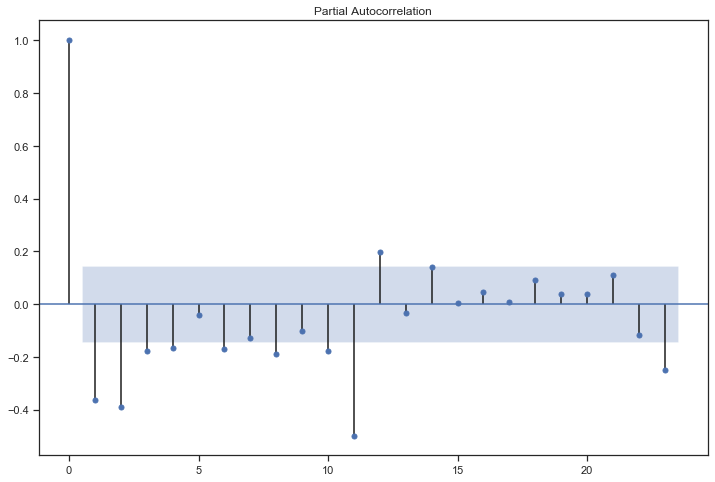

In [316]:
# Partial Autocorrelation plot

plot_pacf(df_rose.diff().dropna(),alpha=0.05,method='ywmle');

In [319]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [320]:
ARIMA_AIC_rose = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC_rose

Empty DataFrame
Columns: [param, AIC]
Index: []

In [321]:
for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model_rose = ARIMA(train_rose['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_rose.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param':param, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.671528853576
ARIMA(1, 1, 0) - AIC:1317.3503105381535
ARIMA(1, 1, 1) - AIC:1280.5742295380041
ARIMA(1, 1, 2) - AIC:1279.8707234231897
ARIMA(2, 1, 0) - AIC:1298.6110341604985
ARIMA(2, 1, 1) - AIC:1281.507862186858
ARIMA(2, 1, 2) - AIC:1281.8707222264297


In [322]:
ARIMA_AIC_rose.sort_values(by='AIC',ascending=True).head()

param          AIC
2  (0, 1, 2)  1279.671529
5  (1, 1, 2)  1279.870723
4  (1, 1, 1)  1280.574230
7  (2, 1, 1)  1281.507862
8  (2, 1, 2)  1281.870722

In [323]:
auto_ARIMA_rose = ARIMA(train_rose, order=(0, 1, 2))

results_auto_ARIMA_rose = auto_ARIMA_rose.fit()

print(results_auto_ARIMA_rose.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 23 Jan 2022   AIC                           1279.672
Time:                        18:15:51   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

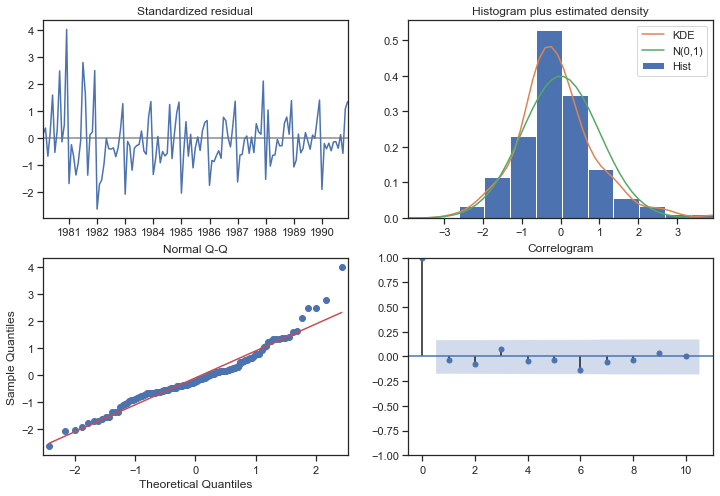

In [324]:
results_auto_ARIMA_rose.plot_diagnostics();

In [325]:
predicted_auto_ARIMA_rose = results_auto_ARIMA_rose.forecast(steps=len(test_rose))
predicted_auto_ARIMA_df_rose = test_rose.copy()
predicted_auto_ARIMA_df_rose['ARIMA_AIC'] = predicted_auto_ARIMA_rose
predicted_auto_ARIMA_df_rose.head()

Rose  ARIMA_AIC
YearMonth                  
1991-01-01  54.0  96.026636
1991-02-01  55.0  87.495114
1991-03-01  66.0  87.495114
1991-04-01  65.0  87.495114
1991-05-01  60.0  87.495114

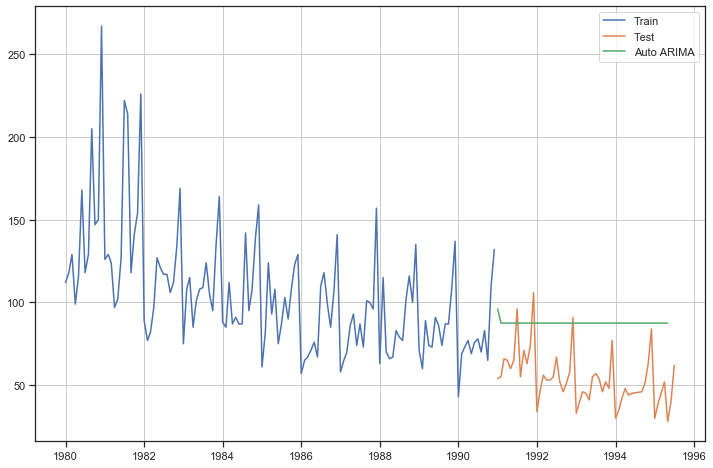

In [326]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predicted_auto_ARIMA_rose, label='Auto ARIMA')

plt.legend(loc='best')
plt.grid()

In [327]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [328]:
rmse_rose = mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA_rose,squared=False)
mape_rose = mean_absolute_percentage_error(test_rose['Rose'],predicted_auto_ARIMA_rose)
print('RMSE:',rmse_rose,'\nMAPE:',mape_rose)

RMSE: 37.11794152295123 
MAPE: 76.21553193796073


In [329]:
resultsDf10_rose = pd.DataFrame({'Test RMSE': rmse_rose}
                           ,index=['AIC_ARIMA(0,1,2)'])

resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf10_rose])
resultsDf1_rose

Test RMSE
RegressionOnTime             15.506708
NaiveModel                   79.451540
NaiveModel                   79.451540
SimpleAverageModel           53.221795
2pointTrailingMovingAverage  11.744931
3pointTrailingMovingAverage  14.391938
4pointTrailingMovingAverage  14.726316
6pointTrailingMovingAverage  14.846842
SES                          36.602394
DES                          69.038882
TES_Add                      20.771731
TES_Add_Mul                  19.916581
TES_Mul_Mul                  15.857890
TES_Mul_Mul                  15.857890
AIC_ARIMA(0,1,2)             37.117942

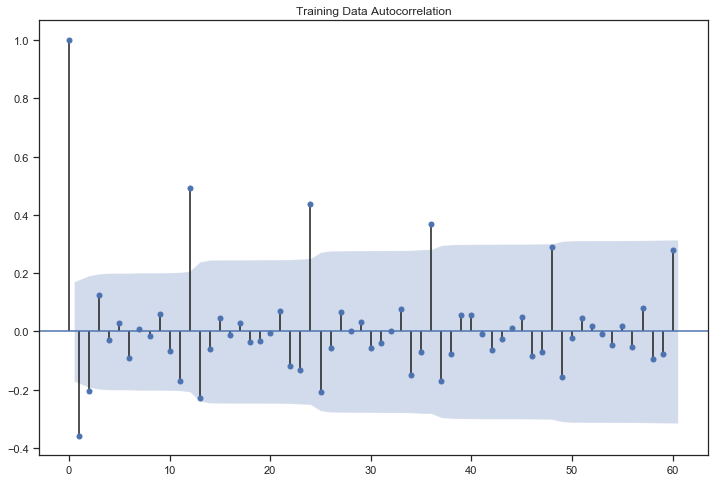

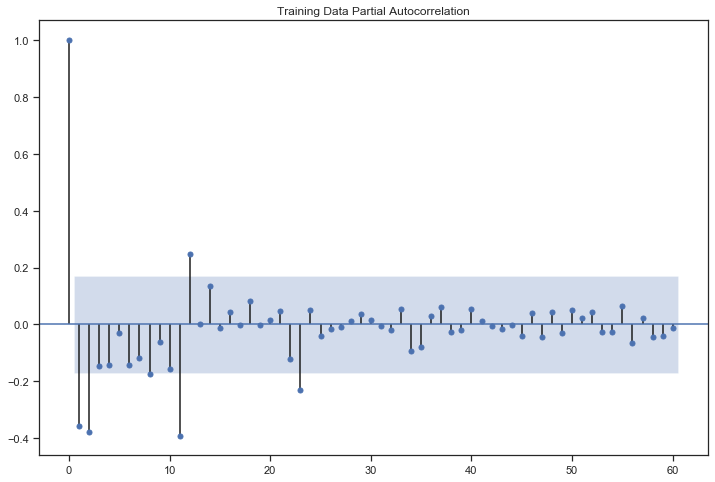

In [330]:
plot_acf(train_rose.diff().dropna(), lags=60, title='Training Data Autocorrelation',missing='drop')
plot_pacf(train_rose.diff().dropna(), lags=60, title='Training Data Partial Autocorrelation',method='ywmle');
plt.show()

In [361]:
manual_ARIMA_rose = ARIMA(train_rose['Rose'], order=(2,1,2))

results_manual_ARIMA_rose = manual_ARIMA_rose.fit()

print(results_manual_ARIMA_rose.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 23 Jan 2022   AIC                           1281.871
Time:                        19:18:12   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

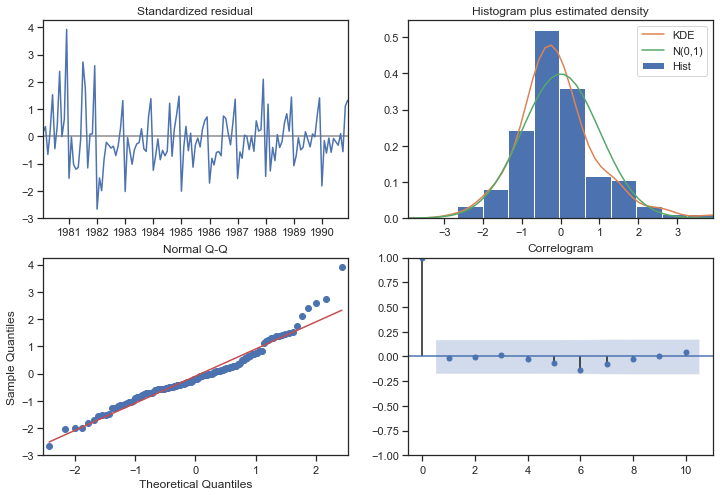

In [362]:
results_manual_ARIMA_rose.plot_diagnostics();

In [363]:
predicted_manual_ARIMA_rose = results_manual_ARIMA_rose.forecast(steps=len(test_rose))
predicted_manual_ARIMA_df_rose = test_rose.copy()
predicted_manual_ARIMA_df_rose['ARIMA_Manual'] = predicted_manual_ARIMA_rose
predicted_manual_ARIMA_df_rose.head()

Rose  ARIMA_Manual
YearMonth                     
1991-01-01  54.0     91.159512
1991-02-01  55.0     85.314628
1991-03-01  66.0     87.962468
1991-04-01  65.0     86.759563
1991-05-01  60.0     87.306038

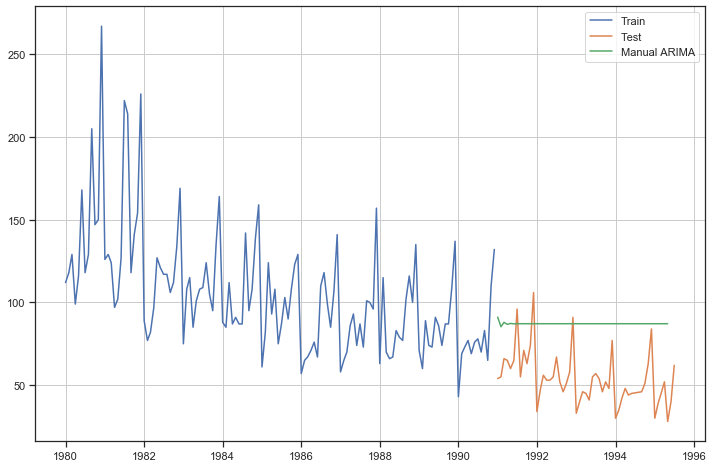

In [364]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predicted_manual_ARIMA_rose, label='Manual ARIMA')

plt.legend(loc='best')
plt.grid()

In [365]:
rmse_rose = mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA_rose,squared=False)
mape_rose = mean_absolute_percentage_error(test_rose['Rose'],predicted_manual_ARIMA_rose)
print('RMSE:',rmse_rose,'\nMAPE:',mape_rose)

resultsDf11_rose = pd.DataFrame({'Test RMSE': rmse_rose}
                           ,index=['Manual_ARIMA(0,1,0)'])

resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf11_rose])
resultsDf1_rose

RMSE: 36.67928979045258 
MAPE: 75.3273519084771


Test RMSE
RegressionOnTime                15.506708
NaiveModel                      79.451540
NaiveModel                      79.451540
SimpleAverageModel              53.221795
2pointTrailingMovingAverage     11.744931
3pointTrailingMovingAverage     14.391938
4pointTrailingMovingAverage     14.726316
6pointTrailingMovingAverage     14.846842
SES                             36.602394
DES                             69.038882
TES_Add                         20.771731
TES_Add_Mul                     19.916581
TES_Mul_Mul                     15.857890
TES_Mul_Mul                     15.857890
AIC_ARIMA(0,1,2)                37.117942
Manual_ARIMA(0,1,0)             79.451540
AIC_SARIMA(0,1,2)(2,1,2,12)     20.504966
Manual_SARIMA(4,1,2)(0,1,2,12)  19.926729
AIC_SARIMA(0,1,2)(2,1,2,12)     20.504966
Manual_ARIMA(0,1,0)             36.679290

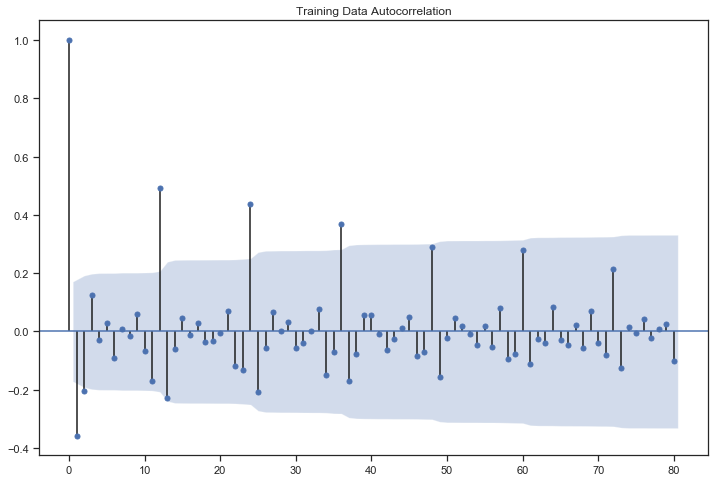

In [336]:
plot_acf(train_rose.diff().dropna(),title='Training Data Autocorrelation',missing='drop',lags=80);

In [337]:
p = q = range(0, 3)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [338]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [339]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301627644
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776231
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601643
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654277
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.5132698374415
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729148269
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244222668
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1113.76631335622
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606717718
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809267325
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.2456655531034
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:929.3362488520096
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161670298071
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:810.3194350158669
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:804.1555757108192
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:782.1538715203384
SARIMA(0, 1, 2)x(0, 1, 0, 12

In [359]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head(5).to_clipboard()

In [343]:
SARIMA_AIC_rose[SARIMA_AIC_rose.isnull()['AIC'] == True]

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [344]:
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 23 Jan 2022   AIC                            774.969
Time:                                    18:20:47   BIC                            792.622
Sample:                                01-01-1980   HQIC                           782.094
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

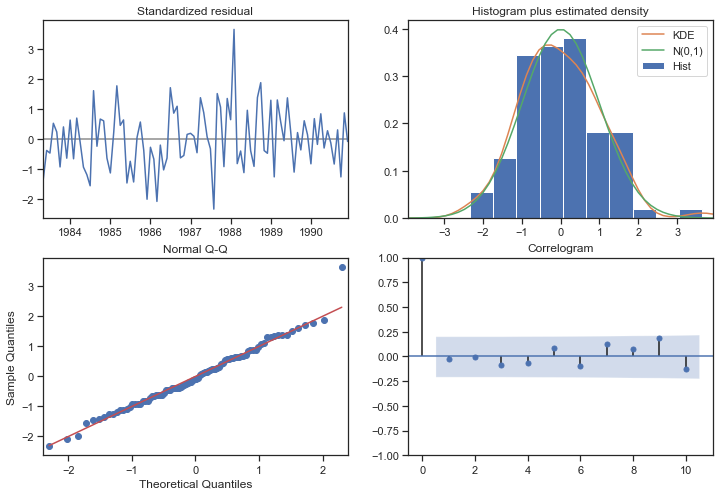

In [345]:
results_auto_SARIMA_rose.plot_diagnostics();

In [346]:
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(test_rose))

In [347]:
predicted_auto_SARIMA_AIC_rose = results_auto_SARIMA_rose.forecast(steps=len(test_rose))
predicted_auto_SARIMA_df_rose = test_rose.copy()
predicted_auto_SARIMA_df_rose['SARIMA_AIC'] = predicted_auto_SARIMA_AIC_rose
predicted_auto_SARIMA_df_rose.head()

Rose  SARIMA_AIC
YearMonth                   
1991-01-01  54.0   44.213588
1991-02-01  55.0   62.327025
1991-03-01  66.0   67.313258
1991-04-01  65.0   63.161150
1991-05-01  60.0   66.474262

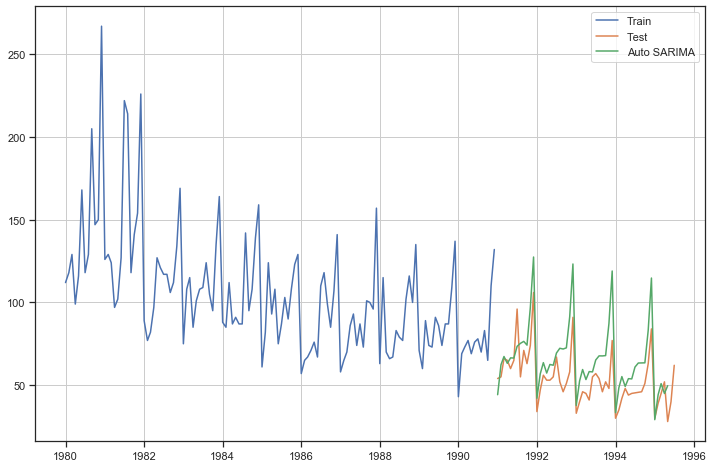

In [348]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predicted_auto_SARIMA_AIC_rose, label='Auto SARIMA')

plt.legend(loc='best')
plt.grid()

In [349]:
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  44.213588  14.221714      16.339541      72.087635
1991-02-01  62.327025  14.300507      34.298545      90.355504
1991-03-01  67.313258  14.302413      39.281044      95.345472
1991-04-01  63.161150  14.305318      35.123243      91.199057
1991-05-01  66.474262  14.310691      38.425823      94.522701

In [360]:
rmse_rose = mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_rose.predicted_mean,squared=False)
mape_rose = mean_absolute_percentage_error(test_rose['Rose'],predicted_auto_SARIMA_rose.predicted_mean)
print('RMSE:',rmse_rose,'\nMAPE:',mape_rose)

resultsDf12_rose = pd.DataFrame({'Test RMSE': rmse_rose}
                           ,index=['AIC_SARIMA(0,1,2)(2,1,2,12)'])

resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf12_rose])
resultsDf1_rose.to_clipboard()

RMSE: 20.504966074952115 
MAPE: 25.269389094412446


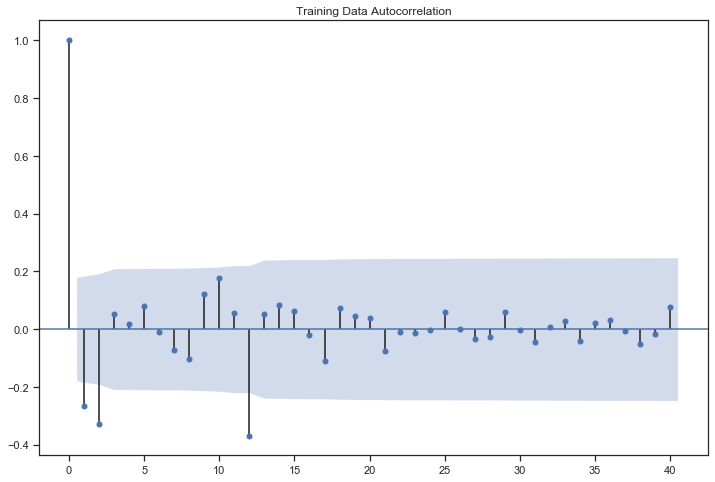

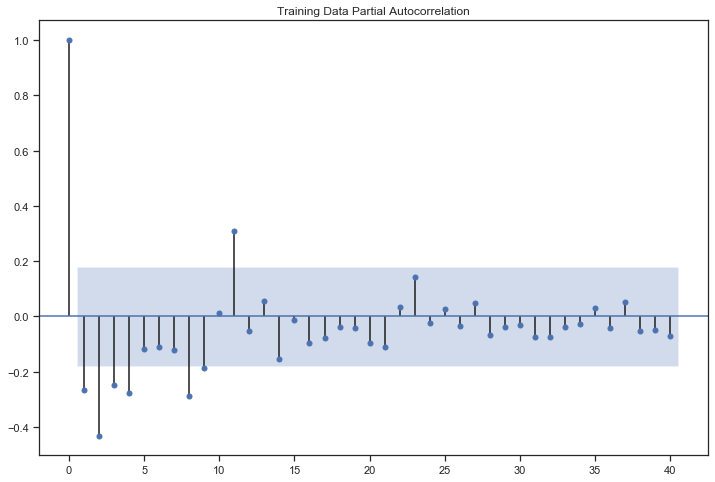

In [351]:
plot_acf((train_rose.diff(12).dropna()).diff().dropna(), lags=40, title='Training Data Autocorrelation',missing='drop')
plot_pacf((train_rose.diff(12).dropna()).diff().dropna(), lags=40, title='Training Data Partial Autocorrelation',method='ywmle');

In [352]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Sun, 23 Jan 2022   AIC                            786.737
Time:                                    18:23:14   BIC                            809.433
Sample:                                01-01-1980   HQIC                           795.898
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

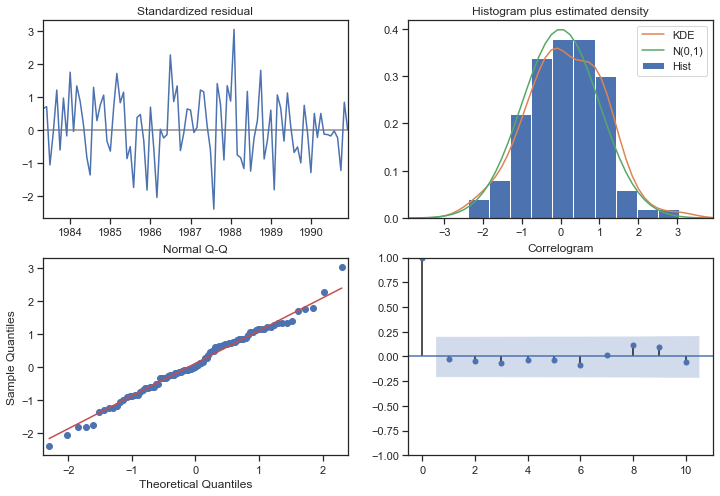

In [353]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

In [354]:
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test_rose))

In [355]:
predicted_manual_SARIMA_model_rose = results_manual_SARIMA_rose.forecast(steps=len(test_rose))
predicted_manual_SARIMA_df_rose = test_rose.copy()
predicted_manual_SARIMA_df_rose['SARIMA_Manual'] = predicted_manual_SARIMA_model_rose
predicted_manual_SARIMA_df_rose.head()

Rose  SARIMA_Manual
YearMonth                      
1991-01-01  54.0      44.733041
1991-02-01  55.0      64.208694
1991-03-01  66.0      65.110690
1991-04-01  65.0      68.453063
1991-05-01  60.0      61.423433

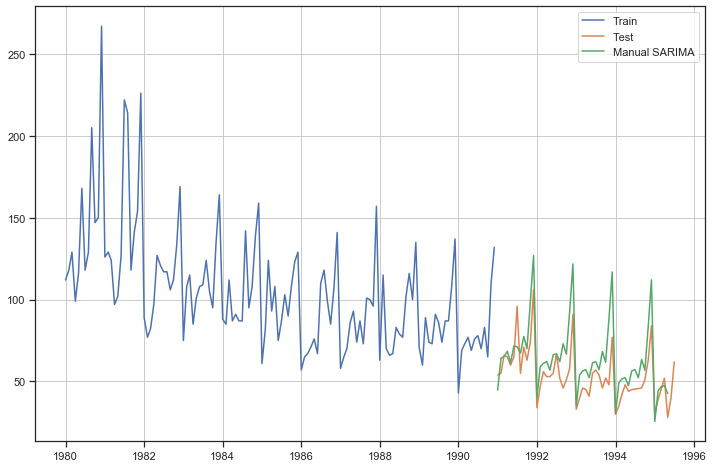

In [356]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(predicted_manual_SARIMA_model_rose, label='Manual SARIMA')

plt.legend(loc='best')
plt.grid()

In [357]:
rmse_rose = mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_rose.predicted_mean,squared=False)
rmse_rose

19.926728539241804

In [366]:
rmse_rose = mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_rose.predicted_mean,squared=False)
mape_rose = mean_absolute_percentage_error(test_rose['Rose'],predicted_manual_SARIMA_rose.predicted_mean)
print('RMSE:',rmse_rose,'\nMAPE:',mape_rose)

resultsDf13_rose = pd.DataFrame({'Test RMSE': rmse_rose}
                           ,index=['Manual_SARIMA(4,1,2)(0,1,2,12)'])

resultsDf1_rose = pd.concat([resultsDf1_rose, resultsDf13_rose])
resultsDf1_rose.to_clipboard()

RMSE: 19.926728539241804 
MAPE: 22.358322835564927


In [367]:
full_data_model_rose = sm.tsa.statespace.SARIMAX(df_rose['Rose'],
                                order=(4,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = full_data_model_rose.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  185
Model:             SARIMAX(4, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -655.578
Date:                            Sun, 23 Jan 2022   AIC                           1331.156
Time:                                    20:02:16   BIC                           1361.719
Sample:                                         0   HQIC                          1343.569
                                            - 185                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3793      0.530      0.716      0.474      -0.660       1.418
ar.L2         -0.1996      0.113   

In [368]:
predicted_manual_SARIMA_full_data_rose = results_full_data_model_rose.get_forecast(steps=12)
predicted_manual_SARIMA_full_data_rose

In [379]:
pred_full_manual_SARIMA_date_rose = predicted_manual_SARIMA_full_data_rose.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date_rose.to_clipboard()

In [370]:
rmse_rose = mean_squared_error(df_rose['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_rose)

RMSE of the Full Model 31.568237341584542


In [374]:
axis = df_rose.plot(label='Actual', figsize=(15,8))
pred_full_manual_SARIMA_date_rose['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_full_manual_SARIMA_date_rose.index, pred_full_manual_SARIMA_date_rose['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date_rose['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid();

ValueError: view limit minimum -36229.5 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36229.5 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1080x576 with 1 Axes>

In [375]:
prediction_1_rose = results_full_data_model_rose.forecast(steps=12)
prediction_1_rose

185    52.293502
186    45.124122
187    49.975377
188    57.409102
189    69.766053
190    39.272175
191    43.950844
192    47.028805
193    50.651748
194    36.955684
195    45.564195
196    57.934776
dtype: float64

In [378]:
pred_2_df_rose = pd.DataFrame({'lower_CI':prediction_1_rose - 1.96*np.std(results_full_data_model_rose.resid,ddof=1),
                          'prediction':prediction_1_rose,
                          'upper_ci': prediction_1_rose + 1.96*np.std(results_full_data_model_rose.resid,ddof=1)})
pred_2_df_rose.head().to_clipboard()

In [377]:
axis = df_rose.plot(label='Actual', figsize=(15,8))
pred_2_df_rose['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df_rose.index, pred_2_df_rose['lower_CI'], pred_2_df_rose['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

ValueError: view limit minimum -36229.5 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36229.5 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1080x576 with 1 Axes>